# EFECTO DE LAS TEMPERATURAS EN LOS PRECIOS DE LAS FRUTAS Y VERDURAS

Integrantes:
1. Corrales Linos Marco Antonio
2. Sánchez Mejía Carla

## Introducción

"En la última década, la recurrencia de las ondas de calor se ha incrementado en todo el país. Estos eventos extremos de temperatura tienen el potencial de disminuir el rendimiento de los cultivos de las frutas y verduras, reduciendo su oferta en los mercados y, posiblemente, incrementando el precio de estos productos"(Banxico, 2023) Para visualizar este efecto analizaremos algunos factores climáticos de las ciudades así como los precios promedios de las frutas y verduras seleccionadas.

En primer lugar, nos concentraremos en el análisis de los precios promedio mensuales de frutas en diversas ciudades. El mercado de productos agrícolas es altamente sensible a factores como la oferta y la demanda, las condiciones climáticas y los costos de transporte. Al analizar los precios de frutas populares, como el aguacate, la cebolla, el jitomate y la naranja, obtendremos una comprensión más profunda de cómo estos factores afectan los precios a lo largo del tiempo y en diferentes ubicaciones geográficas. Emplearemos técnicas similares de análisis estadístico y visualización de datos para explorar estas tendencias y patrones.

En segundo lugar, nos sumergiremos en el análisis de las temperaturas máximas mensuales por estado. Las variaciones en las temperaturas pueden impactar significativamente en varios sectores, desde la agricultura hasta la gestión de recursos naturales y la planificación urbana. Por lo tanto, resulta crucial entender cómo fluctúan las temperaturas a lo largo del tiempo y en diferentes regiones geográficas. Para ello, realizaremos análisis estadísticos descriptivos, como el cálculo de promedios, medianas y modas, y representaremos visualmente estas tendencias mediante gráficos de barras y diagramas de caja.

Finalmente realizaremos un Modelo de regresión multivariada y series de Tiempo para poder predecir a futuro los precios de las frutas y verduras seleccionadas. Comparando estos resultados con los informes presentados en Banxico y noticias del economista con respecto a la tendencia y nivel de relación entre estas variables.


## ANÁLISIS EXPLORATORIO EN EL PRECIO DE LAS FRUTAS

Para el análisis exploratorio se obtuvieron los precios promedios por fruta del Instituto Nacional de Estadística, Geografía e Informática (INEGI), así como las temperturas máximas mensuales proporcionadas por Meteorológico Nacional.

Las ciudades analizadas fueron 2 del norte, 2 del centro y 2 del sur del país:
1. Ciudad Juaréz, Chihuahua
2. La Paz, Baja California
3. Mérida, Yucatán
4. San Luís Potosí, San Luís Potosí
5. Toluca, Estado de México
6. Tapachula, Chiapas

Se analizaron los precios de las siguientes frutas y verduras:
1. Aguacate
2. Naranja
3. Jitomate
4. Cebolla

Debido a que se tenían diferentes precios por mes por ciudad, se calcularon los promedios para tener solo uno de forma mensual


Primero cargamos todos los datos y realizamos el análisis exploratorio en conjunto

In [ ]:
# PASO 1: Cargar paqueterías y leer base de datos en Excel.
import pandas as pd
    #  1.1 Lee el archivo Excel
df = pd.read_excel('/content/Precios.xlsx')
df1 = pd.read_excel('/content/temperaturas.xlsx')

## 1) Limpieza de Datos para Unificar precios
Se realizan cálculos estadísticos como promedios, medianas y modas para los precios de diferentes frutas, considerando año, mes y ciudad. Los resultados de los cálculos se imprimen a continuación

###      1.1)  Tabla de precios promedio por fruta:

In [ ]:
# PASO 2: Limpiar la base de datos para unificar los precios promedio por cada ciudad en cada mes
import pandas as pd

# 2.1 Filtra los datos para cada producto específico
aguacate = df[df['Genérico'] == 'Aguacate']
cebolla = df[df['Genérico'] == 'Cebolla']
jitomate = df[df['Genérico'] == 'Jitomate']
naranja = df[df['Genérico'] == 'Naranja']

# 2.2 Calcula el promedio de precios para cada producto en cada año y ciudad
promedio_aguacate = aguacate.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].mean().reset_index().rename(columns={'Precio promedio': 'Promedio Aguacate'})
promedio_cebolla = cebolla.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].mean().reset_index().rename(columns={'Precio promedio': 'Promedio Cebolla'})
promedio_jitomate = jitomate.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].mean().reset_index().rename(columns={'Precio promedio': 'Promedio Jitomate'})
promedio_naranja = naranja.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].mean().reset_index().rename(columns={'Precio promedio': 'Promedio Naranja'})

# 2.3 Combina los promedios en un solo DataFrame
resultados = pd.merge(promedio_aguacate, promedio_cebolla, on=['Año', 'Nombre ciudad'], how='outer')
resultados = pd.merge(resultados, promedio_jitomate, on=['Año', 'Nombre ciudad'], how='outer')
resultados = pd.merge(resultados, promedio_naranja, on=['Año', 'Nombre ciudad'], how='outer')

# 2.4 Mostrar los resultados en una tabla bonita
from IPython.display import display, HTML

display(HTML("<h2>Promedios de Precios por Ciudad y Fruta</h2>"))
display(resultados)

Año            Nombre ciudad  Promedio Aguacate  Promedio Cebolla  \
0   2011        Cd. Juárez, Chih.          36.847708          9.488000   
1   2011           La Paz, B.C.S.          45.616875         11.515083   
2   2011             Mérida, Yuc.          35.455417         10.760167   
3   2011  San Luis Potosí, S.L.P.          35.648438          7.630583   
4   2011         Tapachula, Chis.          41.722083          9.755000   
..   ...                      ...                ...               ...   
79  2024           La Paz, B.C.S.          66.211000         50.098636   
80  2024             Mérida, Yuc.          46.272500         45.671250   
81  2024  San Luis Potosí, S.L.P.          55.615500         43.309545   
82  2024         Tapachula, Chis.          58.014375         43.760000   
83  2024     Toluca, Edo. de Méx.          56.535000         46.761429   

    Promedio Jitomate  Promedio Naranja  
0           15.604762          7.883333  
1           17.711607          7.923333  
2           17.126548          8.141042  
3           12.758571          6.371979  
4           13.539048         23.704271  
..                ...               ...  
79          41.126538         31.814500  
80          36.442727         16.942000  
81          36.485000         21.116364  
82          33.203125         33.186429  
83          42.430000         20.461111  

[84 rows x 6 columns]

### 1.2) Base de datos de temperaturas

In [ ]:
df1

Fecha   BCS  Chiapas  Chihuahua  Edomex   SLP  Yucatán  Nacional
0   2011-01-01  24.8     29.4       20.8    19.5  24.7     29.1      24.6
1   2011-02-01  24.1     29.3       22.0    20.5  25.4     30.4      25.1
2   2011-03-01  27.2     31.4       27.2    23.4  31.0     33.6      28.8
3   2011-04-01  28.8     31.6       32.1    24.0  34.6     35.2      31.7
4   2011-05-01  31.2     33.2       33.0    25.7  35.3     36.2      33.3
..         ...   ...      ...        ...     ...   ...      ...       ...
153 2023-10-01  31.7     31.0       28.1    22.4  30.4     33.9      30.1
154 2023-11-01  28.9     30.0       21.7    22.1  26.9     31.3      26.8
155 2023-12-01  26.3     28.7       19.6    18.7  23.0     29.0      24.2
156 2024-01-01  24.4     31.0       18.4    21.4  24.9     30.3      24.4
157 2024-02-01  24.9     31.3       21.2    23.6  29.0     30.7      26.5

[158 rows x 8 columns]

# ANÁLISIS EXPLORATORIO DE LOS PRECIOS DE LAS FRUTAS

  1. ANÁLISIS GRÁFICO
  
   1.1)Gráficas

   1.2)Histogramas

   1.3)Headmaps

   1.4)Diagramas de cajas

2. ANÁLISIS ESTADÍSTICO

   A) Media, moda, mediana
   
   B) Variabilidad

  ## 1.1 ANÁLISIS GRÁFICO DE TEMPERATURAS

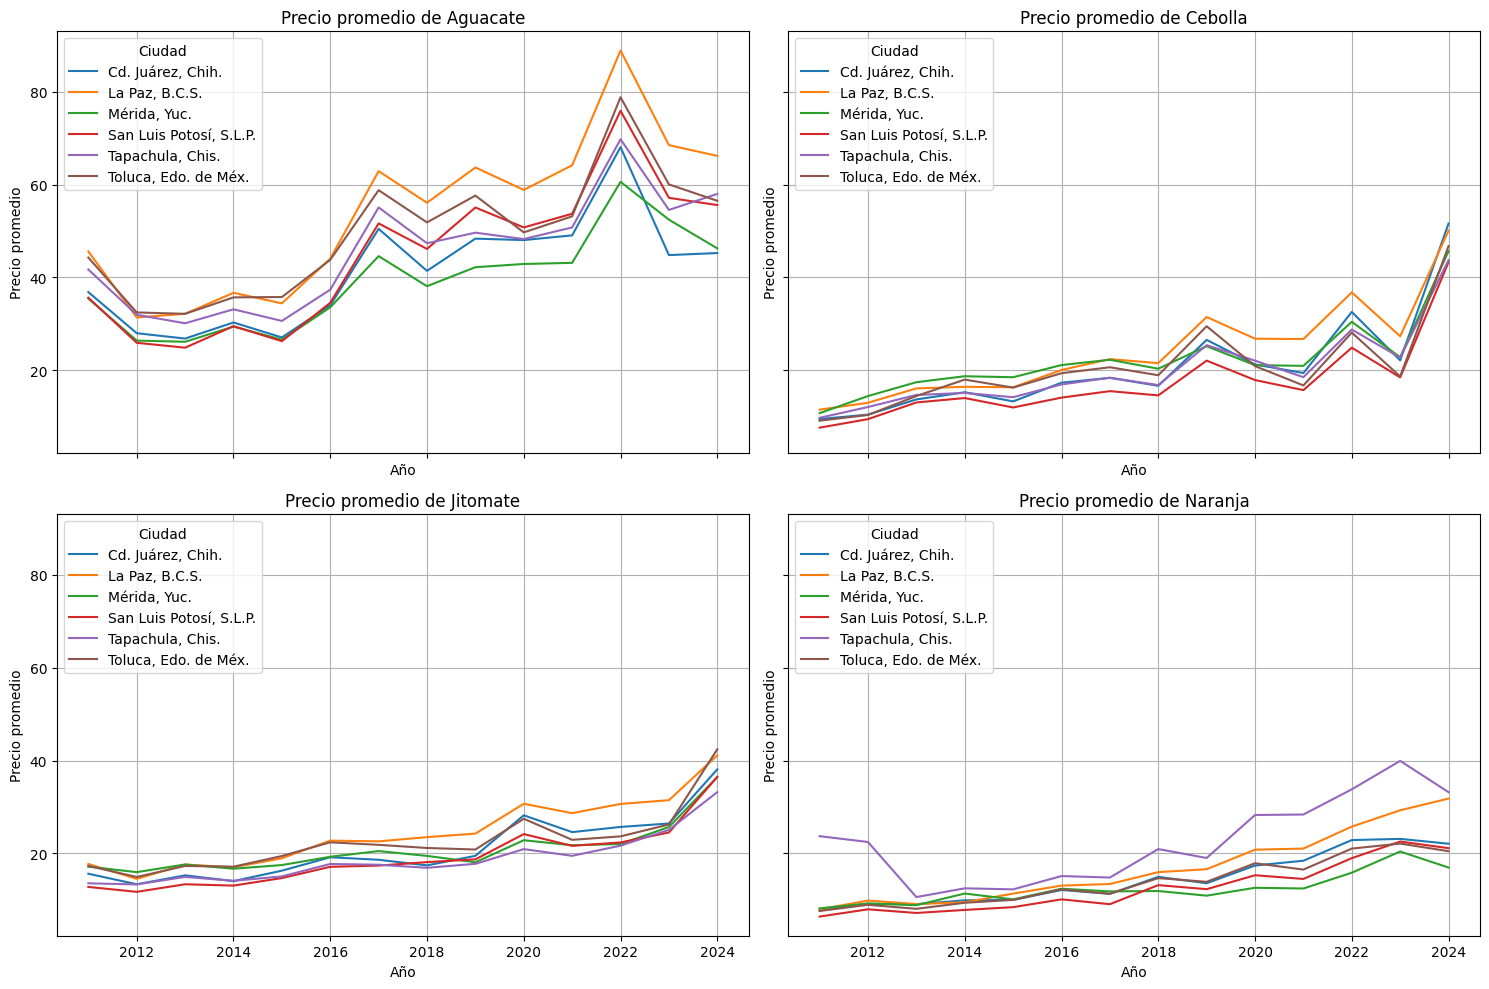

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para cada producto específico
aguacate = df[df['Genérico'] == 'Aguacate']
cebolla = df[df['Genérico'] == 'Cebolla']
jitomate = df[df['Genérico'] == 'Jitomate']
naranja = df[df['Genérico'] == 'Naranja']

# Calcular el promedio de precios para cada producto en cada año y ciudad
promedio_aguacate = aguacate.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].mean().reset_index()
promedio_cebolla = cebolla.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].mean().reset_index()
promedio_jitomate = jitomate.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].mean().reset_index()
promedio_naranja = naranja.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].mean().reset_index()

# Crear un diccionario de los productos con sus datos correspondientes
productos = {
    'Aguacate': promedio_aguacate,
    'Cebolla': promedio_cebolla,
    'Jitomate': promedio_jitomate,
    'Naranja': promedio_naranja
}

# Crear una figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Títulos para los subplots
titulos = ['Aguacate', 'Cebolla', 'Jitomate', 'Naranja']

# Iterar sobre los productos y los ejes para trazar cada gráfica en su subplot correspondiente
for ax, (producto, datos), titulo in zip(axs.flatten(), productos.items(), titulos):
    for ciudad, datos_ciudad in datos.groupby('Nombre ciudad'):
        ax.plot(datos_ciudad['Año'], datos_ciudad['Precio promedio'], label=ciudad)
    ax.set_title(f'Precio promedio de {titulo}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Precio promedio')
    ax.legend(title='Ciudad', loc='upper left')
    ax.grid(True)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()

Los gráficos de líneas que representan la evolución de los precios promedio de cuatro productos agrícolas (aguacate, cebolla, jitomate y naranja) en diferentes ciudades de México desde 2011 hasta 2024. Las ciudades incluidas son Ciudad Juárez (Chihuahua), La Paz (Baja California Sur), Mérida (Yucatán), San Luis Potosí, Tapachula (Chiapas) y el Estado de México. Aquí hay algunas

##Observaciones Generales##

Tendencia al Alza:

Todos los productos muestran una tendencia general al alza en sus precios a lo largo del período.

Variabilidad entre Ciudades:

La Paz (B.C.S.) y Tapachula (Chis.) tienden a tener precios más altos para la mayoría de los productos.Ciudad Juárez (Chih.) y San Luis Potosí (S.L.P.) tienden a tener precios más bajos.

Aumentos Recientes:

Hay aumentos notables en los precios alrededor de 2022 para todos los productos, lo que podría indicar factores económicos o climáticos que afectaron los precios en ese período.

 ## 1.2 Análisis con histogramas

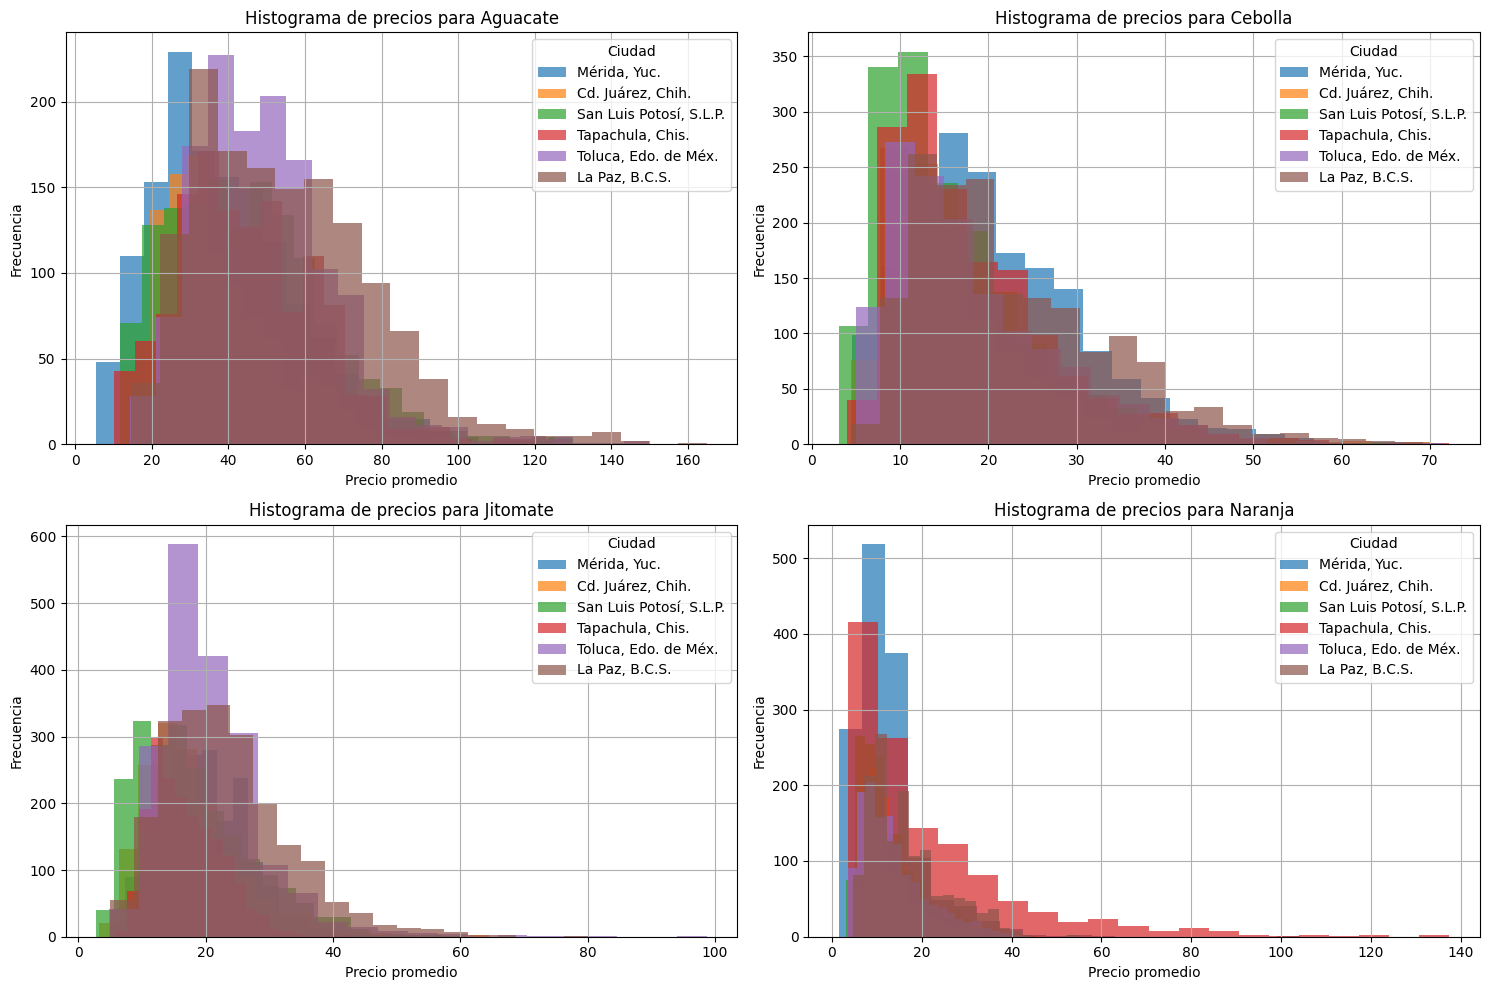

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de frutas
frutas = ['Aguacate', 'Cebolla', 'Jitomate', 'Naranja']

# crear histogramas pero en un solo recuadro
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Iterar sobre las frutas y los ejes para trazar cada histograma
for ax, fruta in zip(axs.flatten(), frutas):
    for ciudad in df['Nombre ciudad'].unique():
        precios_ciudad = df[(df['Genérico'] == fruta) & (df['Nombre ciudad'] == ciudad)]['Precio promedio']
        ax.hist(precios_ciudad, bins=20, alpha=0.7, label=ciudad)
    ax.set_title(f'Histograma de precios para {fruta}')
    ax.set_xlabel('Precio promedio')
    ax.set_ylabel('Frecuencia')
    ax.legend(title='Ciudad', loc='upper right')
    ax.grid(True)

plt.tight_layout()
plt.show()


##Observaciones Generales##

Concentración de Precios:

La mayoría de los productos tienen precios concentrados en los rangos más bajos, con aguacate y cebolla mostrando una mayor dispersión en comparación con jitomate y naranja.

Variabilidad entre Ciudades:

Tapachula (Chis.) y La Paz (B.C.S.) tienden a tener una mayor dispersión de precios y algunos precios más altos en comparación con otras ciudades.
Ciudad Juárez (Chih.), San Luis Potosí (S.L.P.) y el Estado de México tienden a tener precios más concentrados en los rangos más bajos.

Comparación entre Productos:

El aguacate muestra la mayor dispersión de precios, seguido por la cebolla, el jitomate y la naranja.

Estos histogramas proporcionan una visión clara de la distribución de los precios promedio de estos productos agrícolas en diferentes ciudades de México, destacando las diferencias en la variabilidad y concentración de precios entre las ciudades y los productos.

## 1.3 Heatmap de los precios de las Frutas

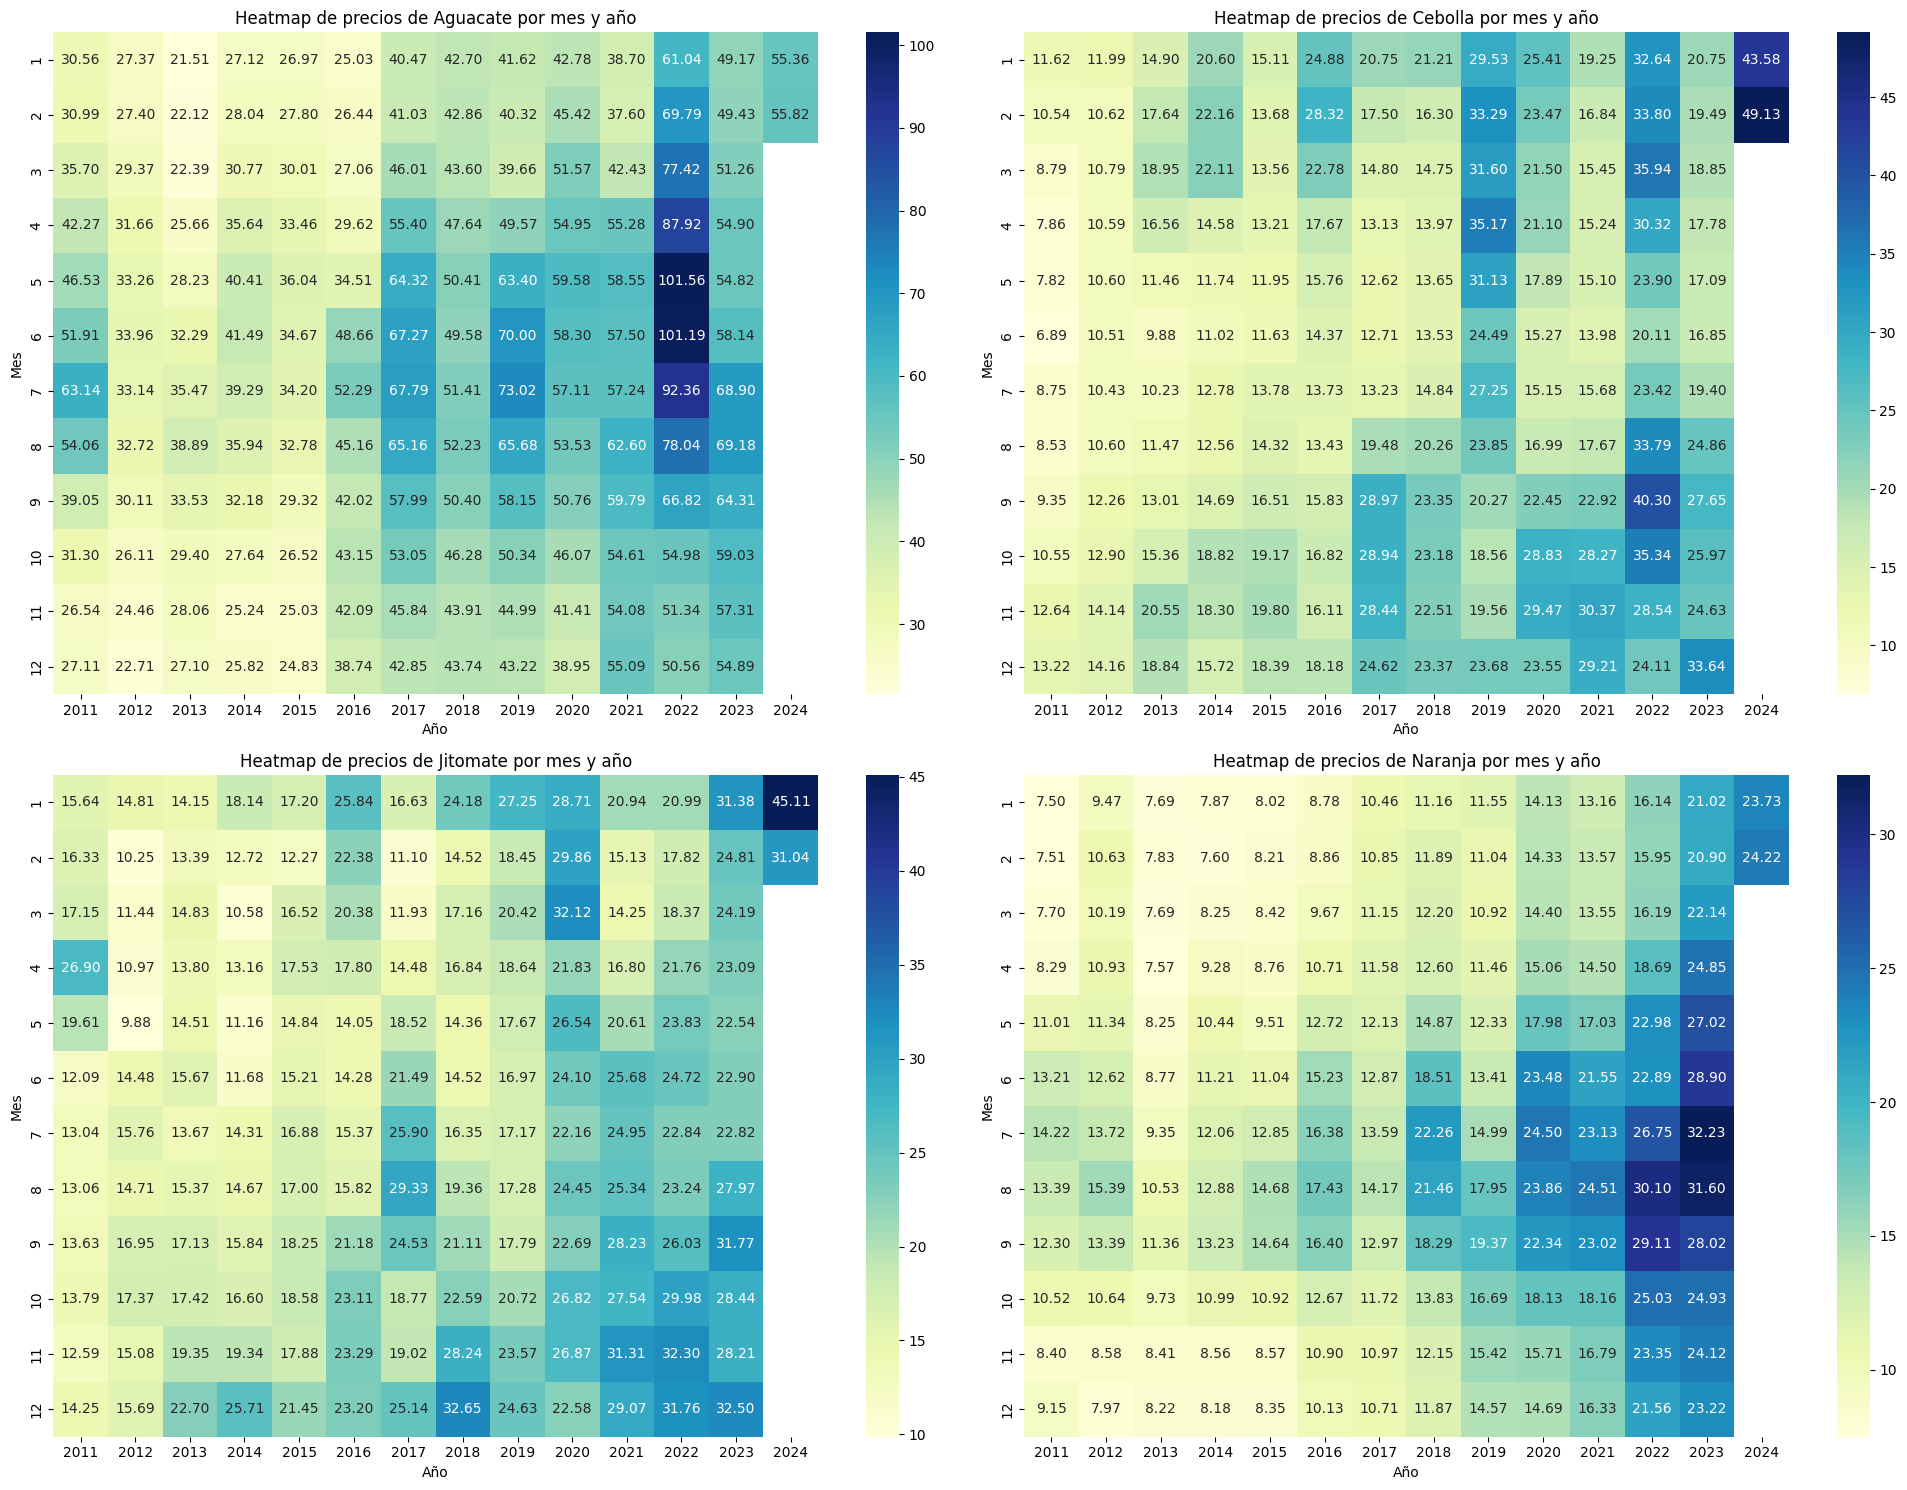

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para crear un heatmap para una fruta específica
def plot_heatmap(ax, df_fruta, nombre_fruta):
    pivot_table = df_fruta.pivot_table(index='Mes', columns='Año', values='Precio promedio')
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", ax=ax)
    ax.set_title(f'Heatmap de precios de {nombre_fruta} por mes y año')
    ax.set_xlabel('Año')
    ax.set_ylabel('Mes')

# Filtrar datos por cada precio de fruta en cada mes
aguacate = df[df['Genérico'] == 'Aguacate']
cebolla = df[df['Genérico'] == 'Cebolla']
jitomate = df[df['Genérico'] == 'Jitomate']
naranja = df[df['Genérico'] == 'Naranja']

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
# Crear heatmaps para cada fruta
plot_heatmap(axs[0, 0], aguacate, 'Aguacate')
plot_heatmap(axs[0, 1], cebolla, 'Cebolla')
plot_heatmap(axs[1, 0], jitomate, 'Jitomate')
plot_heatmap(axs[1, 1], naranja, 'Naranja')
plt.tight_layout()
plt.show()


Estos mapas de calor proporcionan una visión clara de cómo han evolucionado los precios de estos productos agrícolas a lo largo de los años, destacando las tendencias generales y las variaciones anuales.

# 2. ANÁLISIS EXPLORATORIO DE LAS TEMPERATURAS

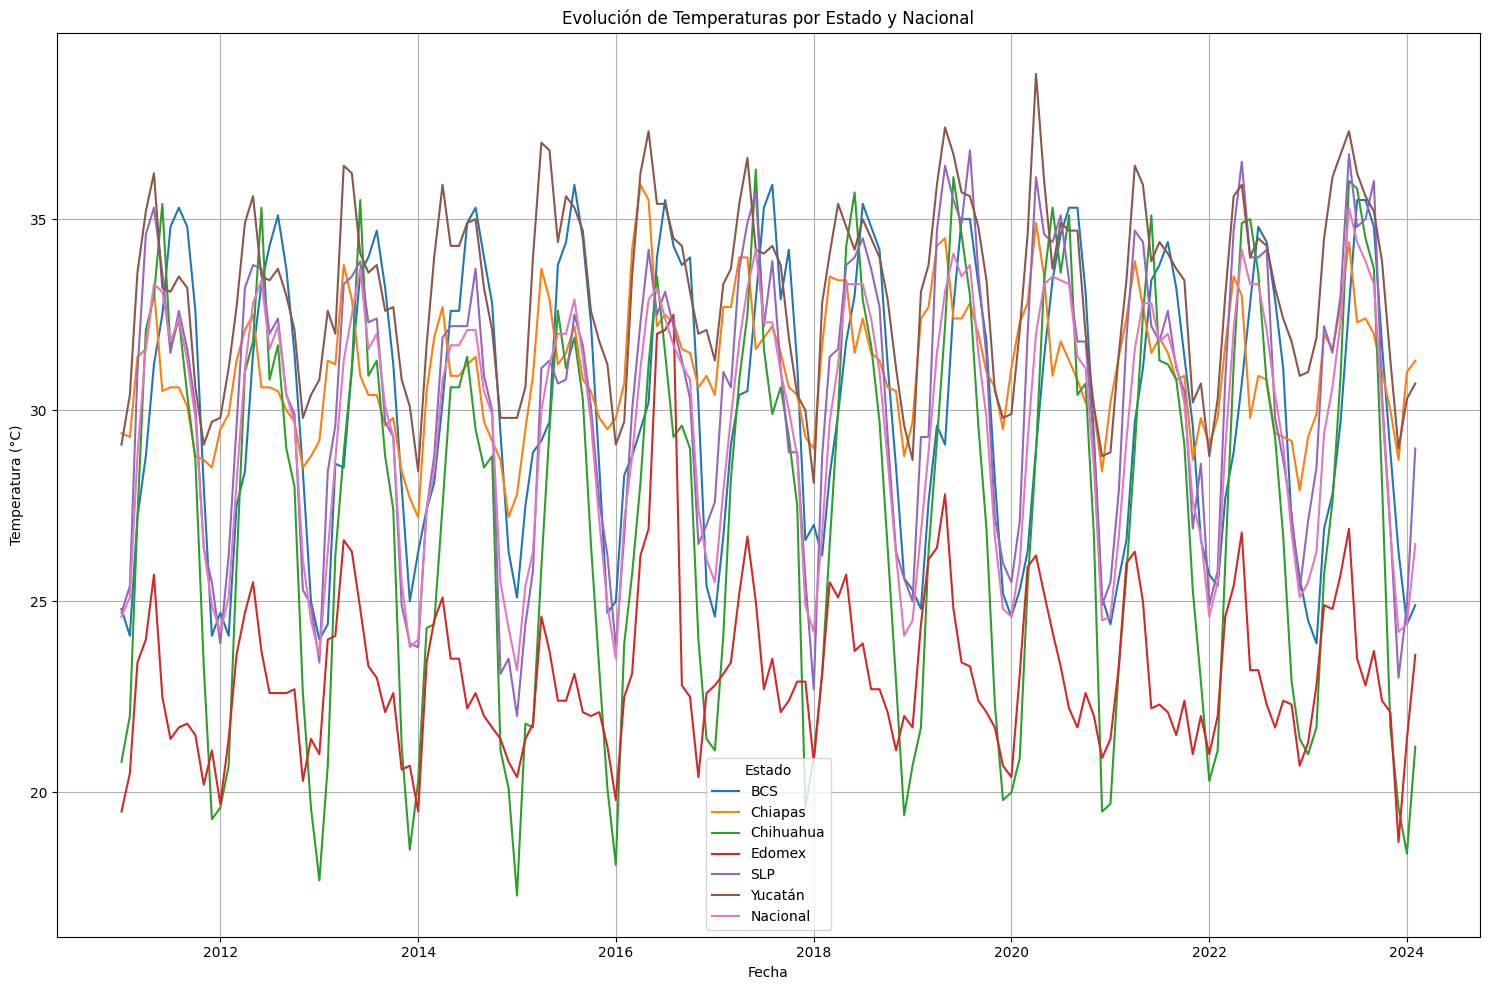

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'Fecha' a tipo datetime
df1['Fecha'] = pd.to_datetime(df1['Fecha'])

# Lista de estados  a graficar
estados = ['BCS', 'Chiapas', 'Chihuahua', 'Edomex', 'SLP', 'Yucatán', 'Nacional']

# Crear una figura y un conjunto de subplots
plt.figure(figsize=(15, 10))

# Graficar cada estado
for estado in estados:
    plt.plot(df1['Fecha'], df1[estado], label=estado)

# Agregar títulos y etiquetas
plt.title('Evolución de Temperaturas por Estado y Nacional')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Estado')
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()



El grafico de líneas representa la evolución de las temperaturas promedio en diferentes estados de México y a nivel nacional desde 2012 hasta 2024.

## Observaciones Generales##
1. **Tendencia General:**
   - Las temperaturas muestran un patrón cíclico anual, con picos y valles que corresponden a las estaciones del año.
   - La temperatura nacional (línea negra) sigue un patrón similar al de los estados, pero con menos variabilidad extrema.

2. **Comparación entre Estados:**
   - **Baja California Sur (BCS):** Muestra temperaturas más altas en comparación con otros estados, con picos que superan los 35°C.
   - **Chiapas:** También muestra temperaturas altas, aunque con menor variabilidad que BCS.
   - **Chihuahua:** Presenta una mayor variabilidad en las temperaturas, con picos altos y valles más bajos, reflejando un clima más extremo.
   - **Estado de México (Edomex):** Muestra temperaturas más moderadas en comparación con otros estados.
   - **San Luis Potosí (SLP):** Similar a Chihuahua, muestra una variabilidad significativa en las temperaturas.
   - **Nacional:** La línea nacional muestra una tendencia más suavizada, reflejando un promedio de las temperaturas de todos los estados.

3. **Picos y Valles:**
   - Los picos de temperatura generalmente ocurren durante los meses de verano (junio, julio, agosto).
   - Los valles de temperatura ocurren durante los meses de invierno (diciembre, enero, febrero).

4. **Variabilidad Anual:**
   - Cada año muestra un patrón cíclico similar, pero con algunas variaciones

### 2.1 Histogramas de las temperaturas por Estado

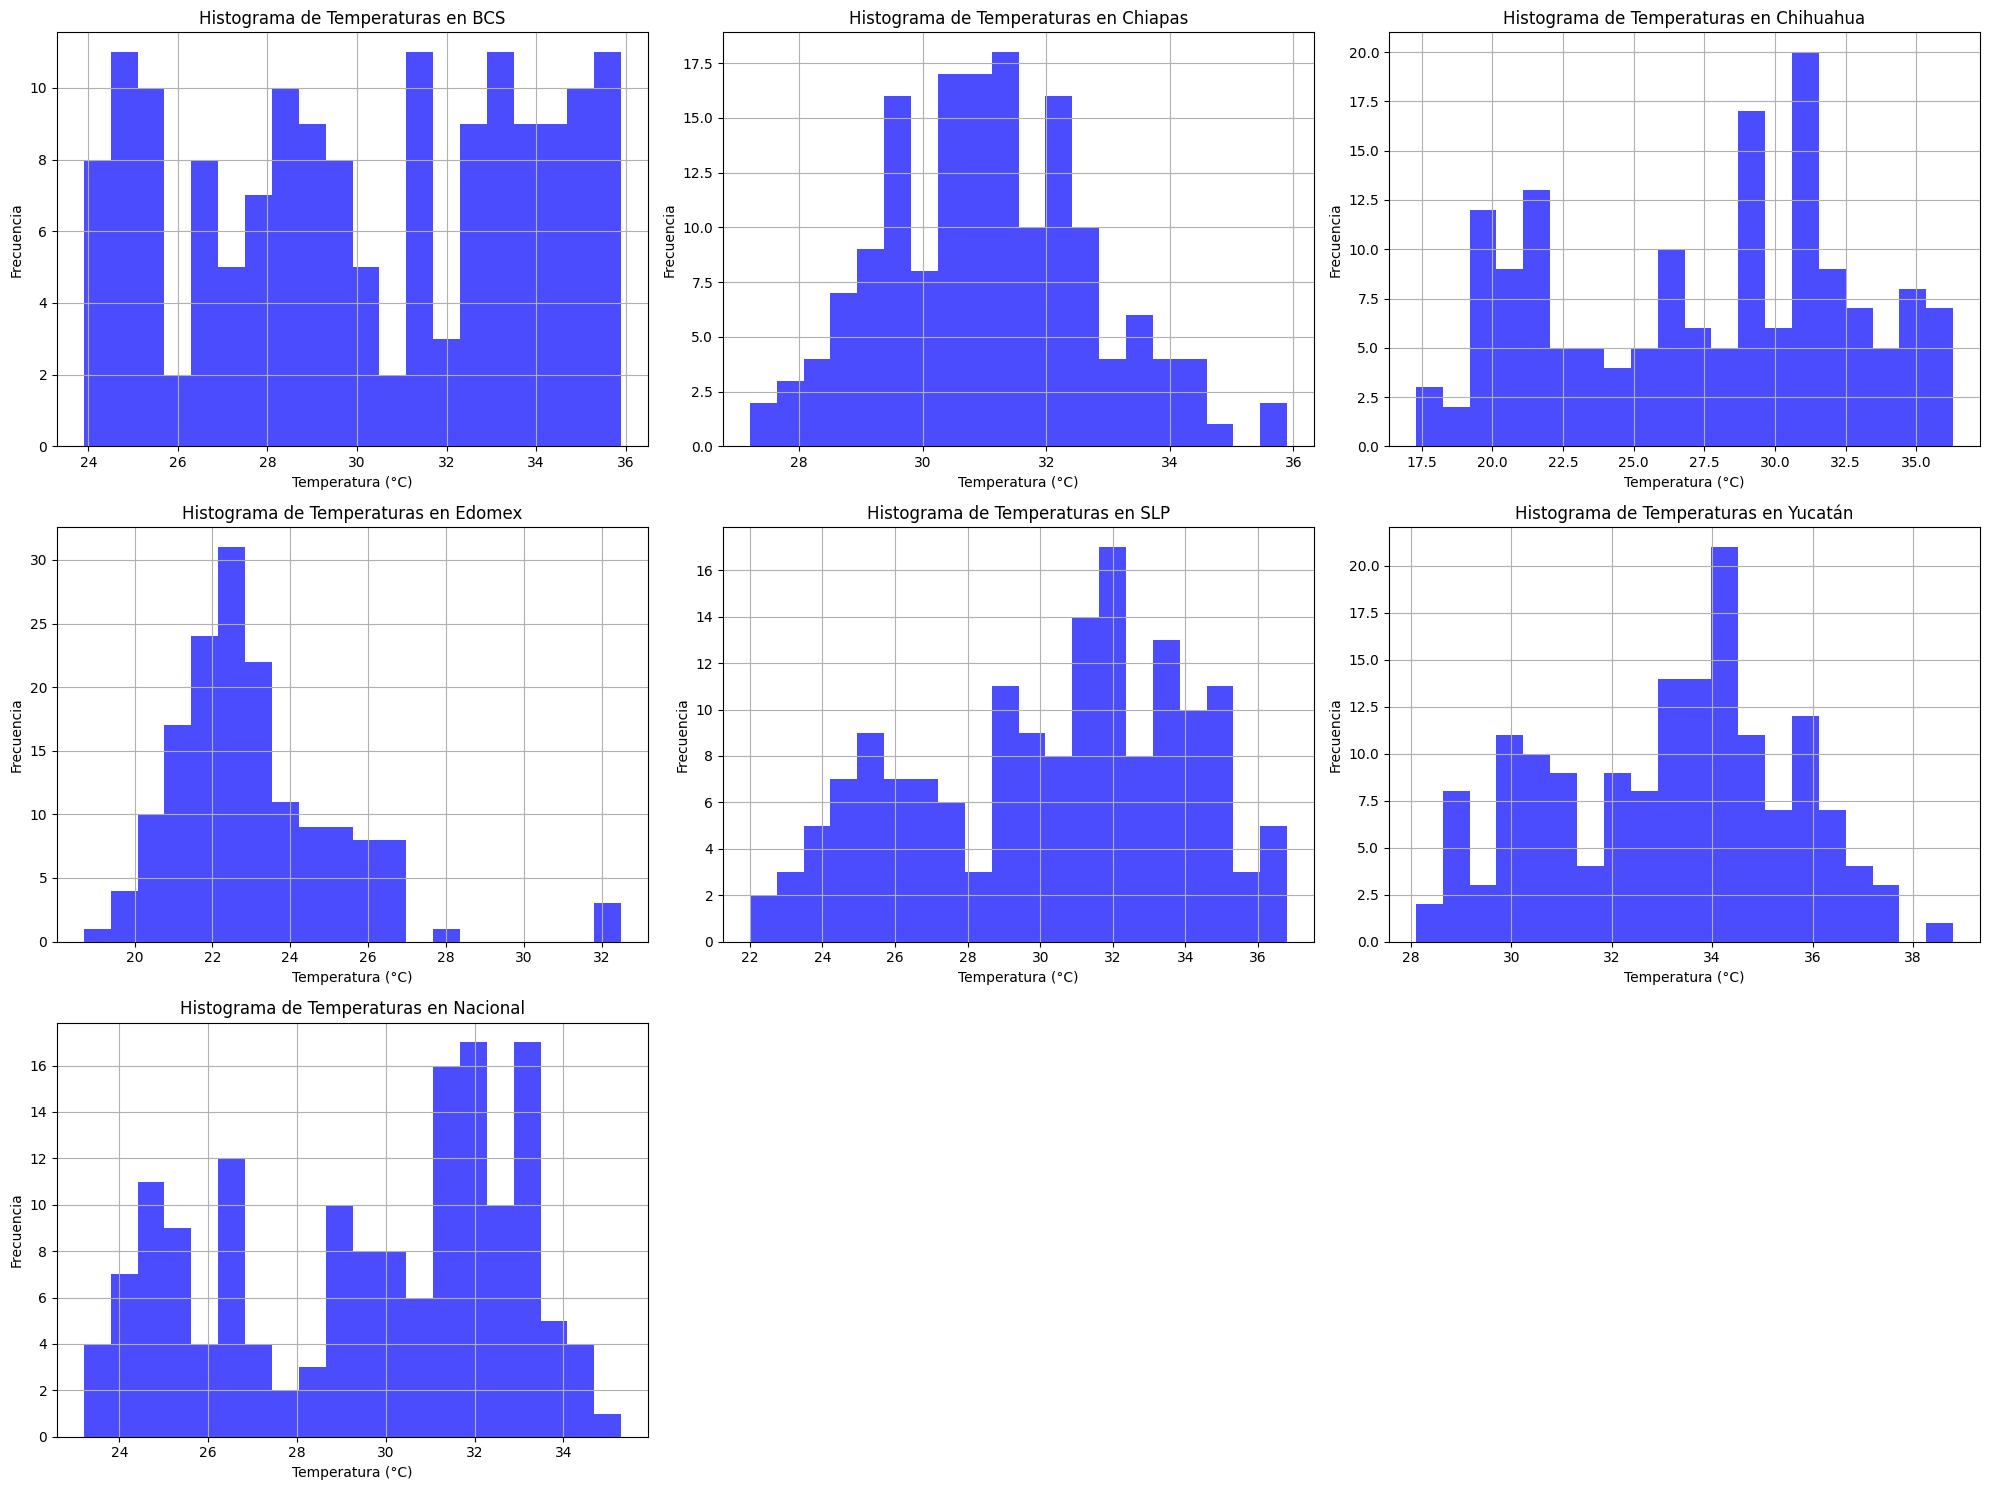

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de estados (columnas) a graficar
estados = ['BCS', 'Chiapas', 'Chihuahua', 'Edomex', 'SLP', 'Yucatán', 'Nacional']

# Número de filas y columnas para los subplots
nrows = 3
ncols = 3

# Crear una figura con subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 15))

# Aplanar el array de ejes para iterar más fácilmente
axs = axs.flatten()

# Graficar un histograma para cada estado en su subplot correspondiente
for i, estado in enumerate(estados):
    axs[i].hist(df1[estado], bins=20, alpha=0.7, color='blue')
    axs[i].set_title(f'Histograma de Temperaturas en {estado}')
    axs[i].set_xlabel('Temperatura (°C)')
    axs[i].set_ylabel('Frecuencia')
    axs[i].grid(True)

# Eliminar subplots vacíos si hay
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()


los histogramas representan la distribución de las temperaturas en diferentes estados de México y a nivel nacional.

## Observaciones Generales##
- **Variabilidad:** Los estados como Chihuahua y San Luis Potosí muestran una mayor variabilidad en las temperaturas.
- **Concentración:** Estados como Baja California Sur y Yucatán tienen una distribución de temperaturas más concentrada en un rango específico.
- **Frecuencia Alta:** La mayoría de los estados tienen una frecuencia alta de temperaturas en el rango de 20°C a 22°C, con algunas excepciones como Baja California Sur y Yucatán, que tienen temperaturas más altas.

Estos histogramas proporcionan una visión clara de cómo se distribuyen las temperaturas en diferentes estados de México y a nivel nacional, destacando las diferencias y similitudes en los patrones de temperatura.


## 3. DIAGRAMA DE CAJAS POR AÑO

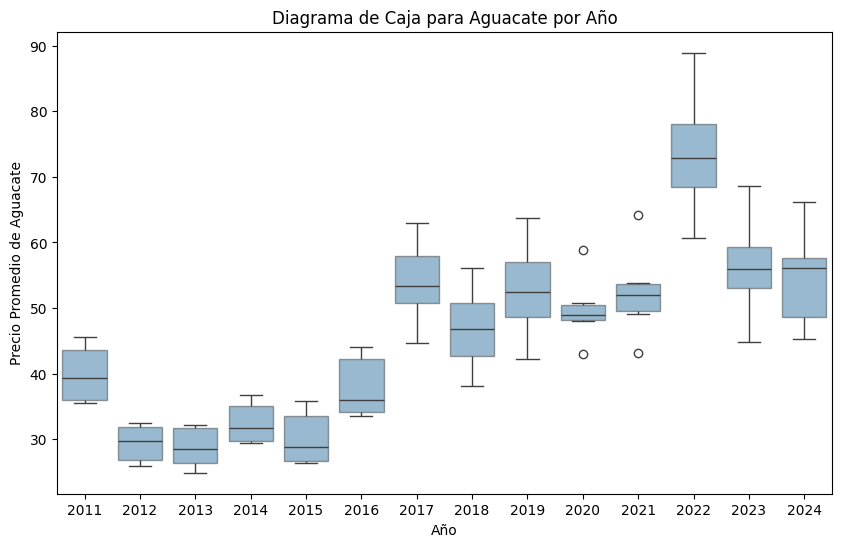

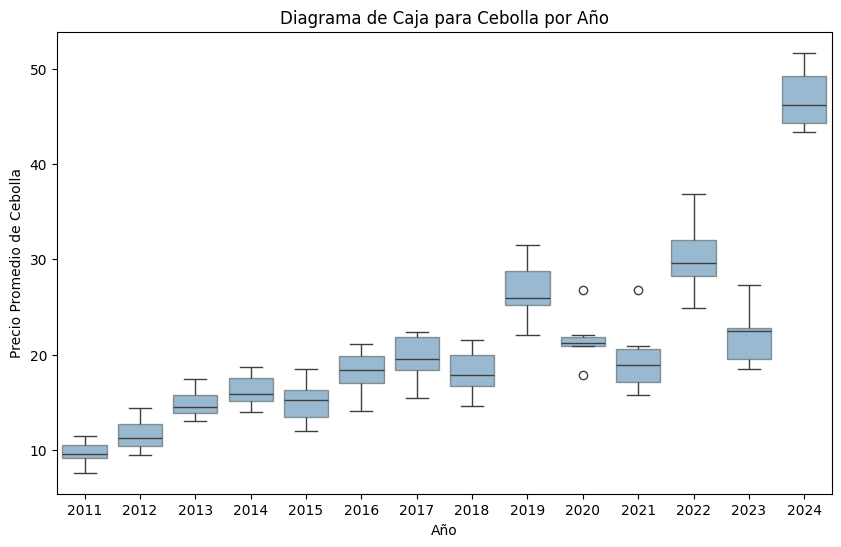

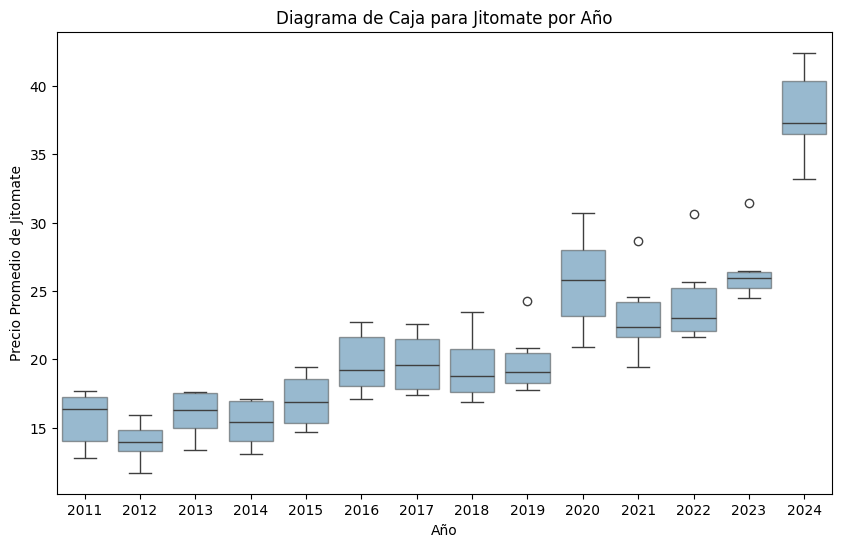

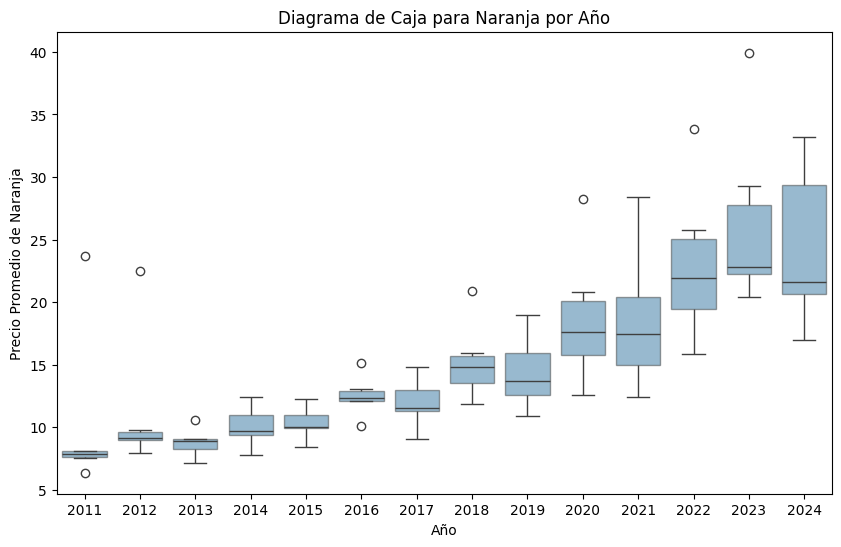

In [ ]:
#Diagrama de caja para la base de los promedios de las frutas y verduras

# Define una lista de los nombres de los productos
productos = ['Aguacate', 'Cebolla', 'Jitomate', 'Naranja']

# Iterar sobre cada producto y trazar el diagrama de caja por año
for producto in productos:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=resultados, x='Año', y=f'Promedio {producto}', boxprops=dict(alpha=0.5))
    plt.title(f'Diagrama de Caja para {producto} por Año')
    plt.xlabel('Año')
    plt.ylabel(f'Precio Promedio de {producto}')
    plt.show()

##Observaciones Generales##

Aumento General de Precios: Todos los productos muestran una tendencia ascendente en los precios a lo largo de los años.

Mayor Variabilidad en Años Recientes: La dispersión de los precios y la presencia de valores atípicos aumentan especialmente a partir de 2018, indicando una mayor volatilidad en el mercado.

Impacto de Eventos Específicos: Los valores atípicos en ciertos años podrían reflejar eventos específicos que afectaron los precios (por ejemplo, fenómenos climáticos, cambios en la demanda y oferta, o políticas económicas).

### En el diagrama anterior se muestra el diagrama de caja según el año y el precio de cada fruta. Sin embargo, para ampliar el análisis se incluyen a continuación los diagramas de cajas que corresponden a los precios según las diferentes temperaturas en los años:

Años disponibles en los datos: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


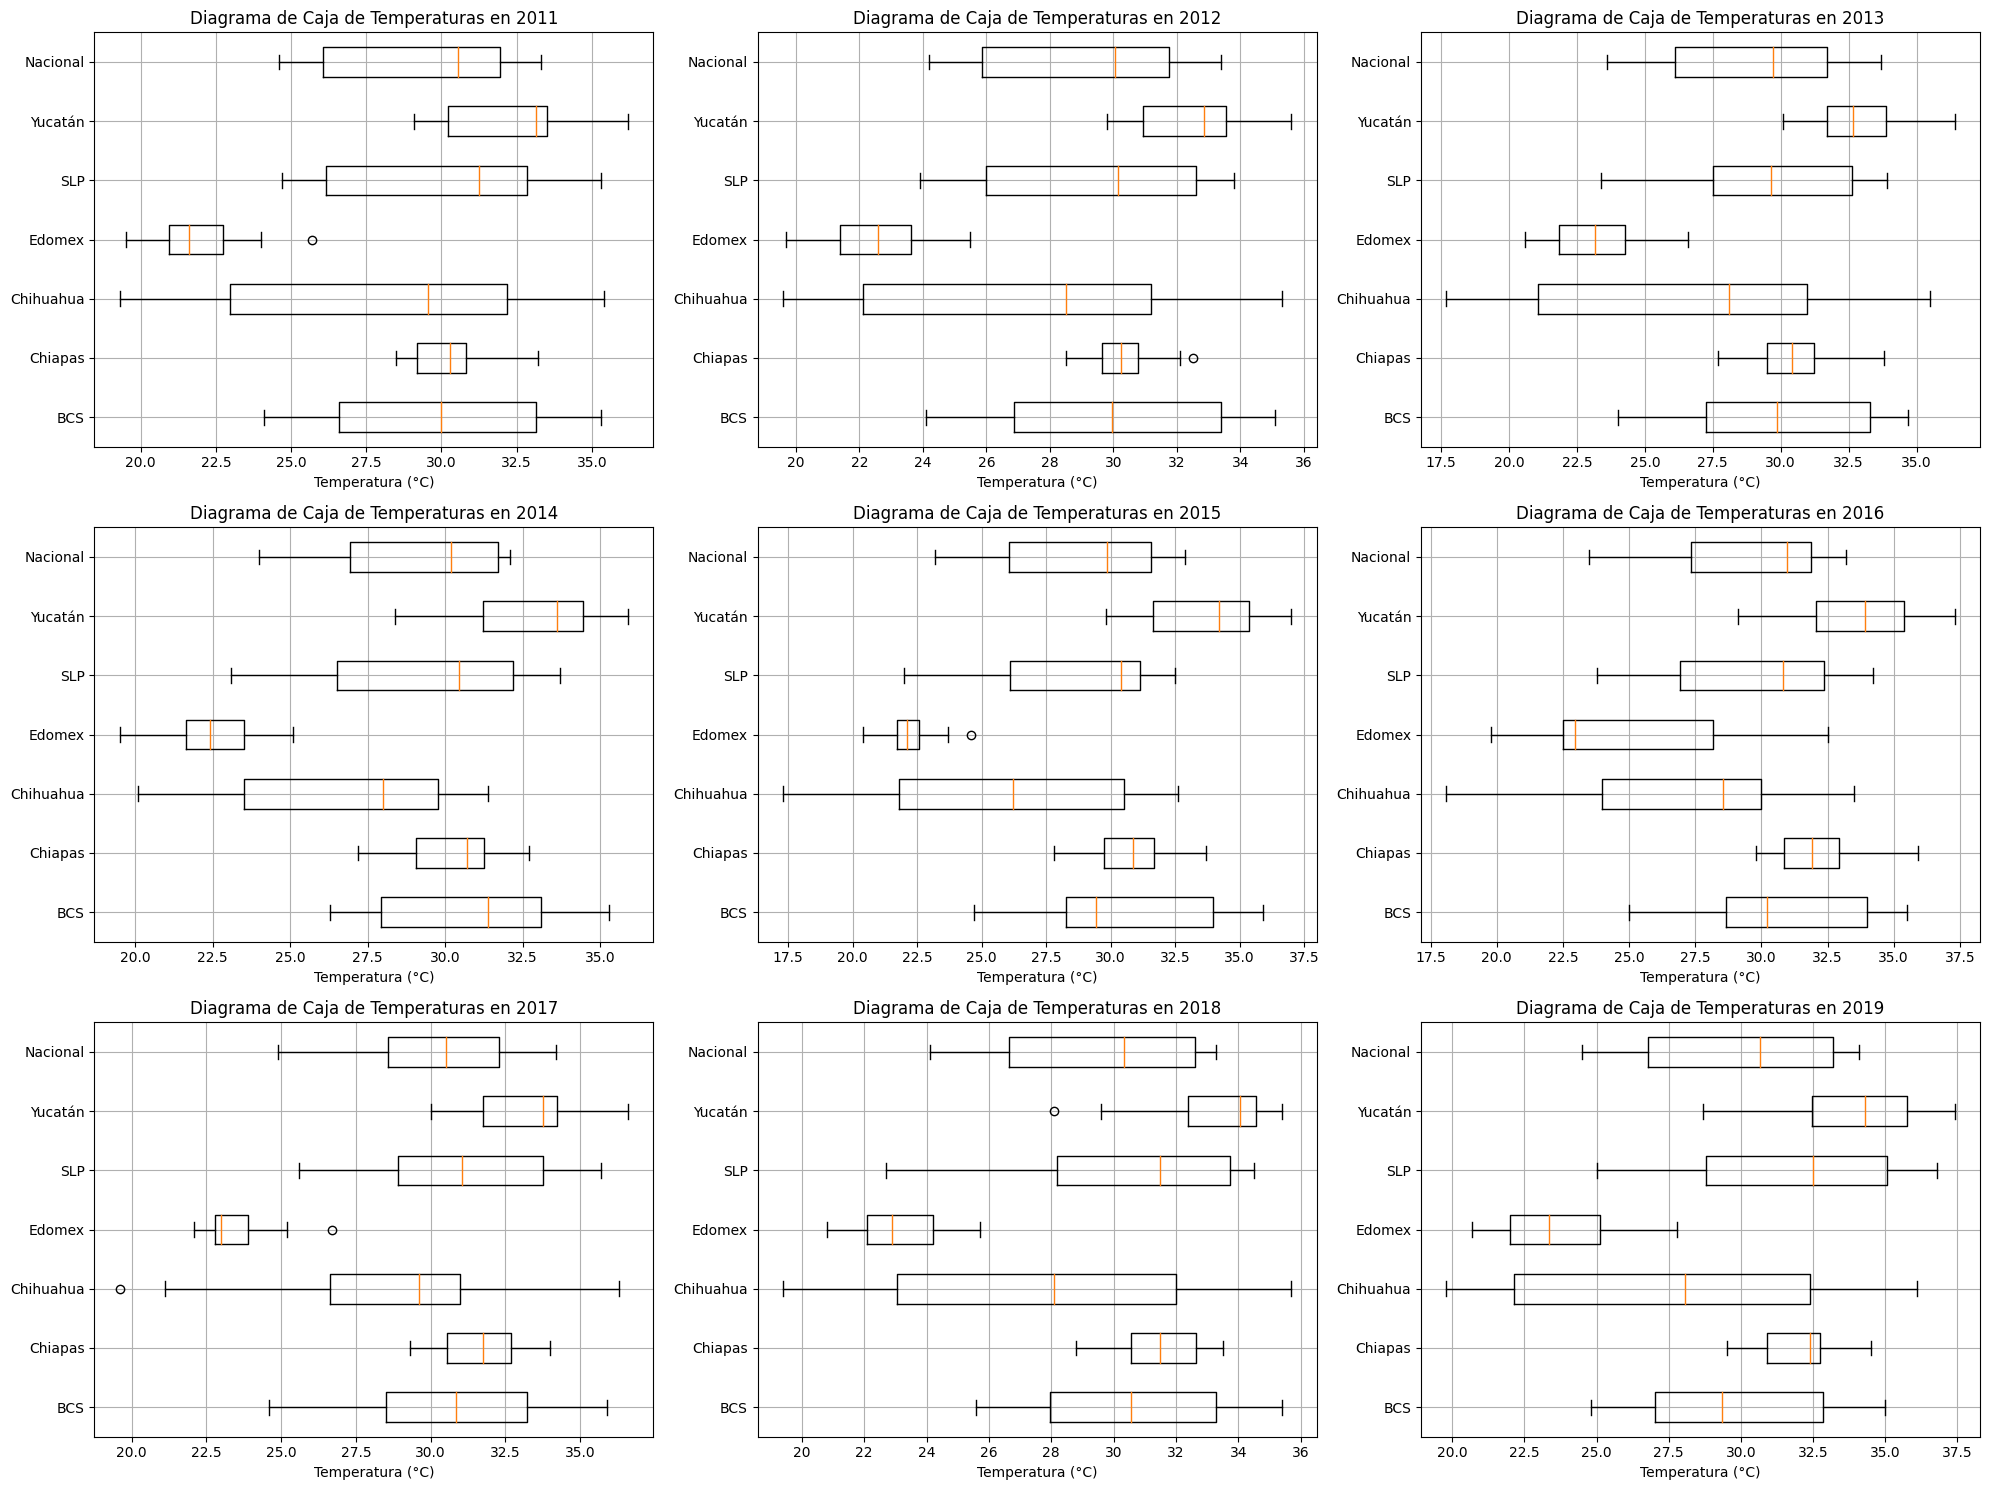

In [ ]:
#Diagrama de caja para la base de temperaturas

# Convertir la columna 'Fecha' a datetime y extraer el año
df1['Fecha'] = pd.to_datetime(df1['Fecha'], errors='coerce')  # Asegura que las fechas incorrectas se conviertan a NaT
df1 = df1.dropna(subset=['Fecha'])  # Elimina filas con fechas no convertibles
df1['Año'] = df1['Fecha'].dt.year

# Verificar los años únicos en el DataFrame
años = df1['Año'].unique()
print("Años disponibles en los datos:", años)

# Lista de estados (columnas) a graficar
estados = ['BCS', 'Chiapas', 'Chihuahua', 'Edomex', 'SLP', 'Yucatán', 'Nacional']

# Número de filas y columnas para los subplots (ajusta según el número de años)
nrows = 3
ncols = 3

# Crear una figura con subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 15))

# Aplanar el array de ejes para iterar más fácilmente
axs = axs.flatten()

# Graficar un diagrama de caja para cada estado y cada año en su subplot correspondiente
for i, año in enumerate(años):
    if i >= len(axs):
        break  # Evita índice fuera de rango si hay más años que subplots disponibles
    datos_por_año = df1[df1['Año'] == año][estados]
    axs[i].boxplot(datos_por_año, vert=False, labels=estados)
    axs[i].set_title(f'Diagrama de Caja de Temperaturas en {año}')
    axs[i].set_xlabel('Temperatura (°C)')
    axs[i].grid(True)

# Eliminar subplots vacíos si hay
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()

##observaciones generales:##

Variabilidad de Temperaturas:

La variabilidad de las temperaturas (rango intercuartílico) varía significativamente entre los estados. Por ejemplo, Chihuahua y Baja California Sur tienden a mostrar una mayor variabilidad en comparación con otros estados.

Medianas:

Las medianas de las temperaturas (línea dentro de la caja) varían entre los estados y los años. Por ejemplo, Yucatán y Chiapas tienden a tener medianas más altas en comparación con otros estados.

Outliers:

Hay varios outliers (puntos fuera de los bigotes) en los diagramas, lo que indica temperaturas extremas que se alejan del rango típico. Estos outliers son más frecuentes en estados como Chihuahua y Baja California Sur.

Comparación Anual:

Al comparar los diagramas de caja de diferentes años, se puede observar que la distribución de las temperaturas puede cambiar de un año a otro. Por ejemplo, en algunos años, la variabilidad de las temperaturas en Chihuahua es mayor que en otros años.

Promedio Nacional:

El promedio nacional de temperaturas también se muestra en cada diagrama de caja. Este promedio proporciona una referencia para comparar las temperaturas de los estados individuales con el promedio nacional.

Tendencias Generales:

Aunque hay variaciones anuales, algunos estados como Yucatán y Chiapas consistentemente muestran temperaturas más altas en comparación con otros estados como el Estado de México y San Luis Potosí.

## HEATMAPS DE TEMPERATURAS

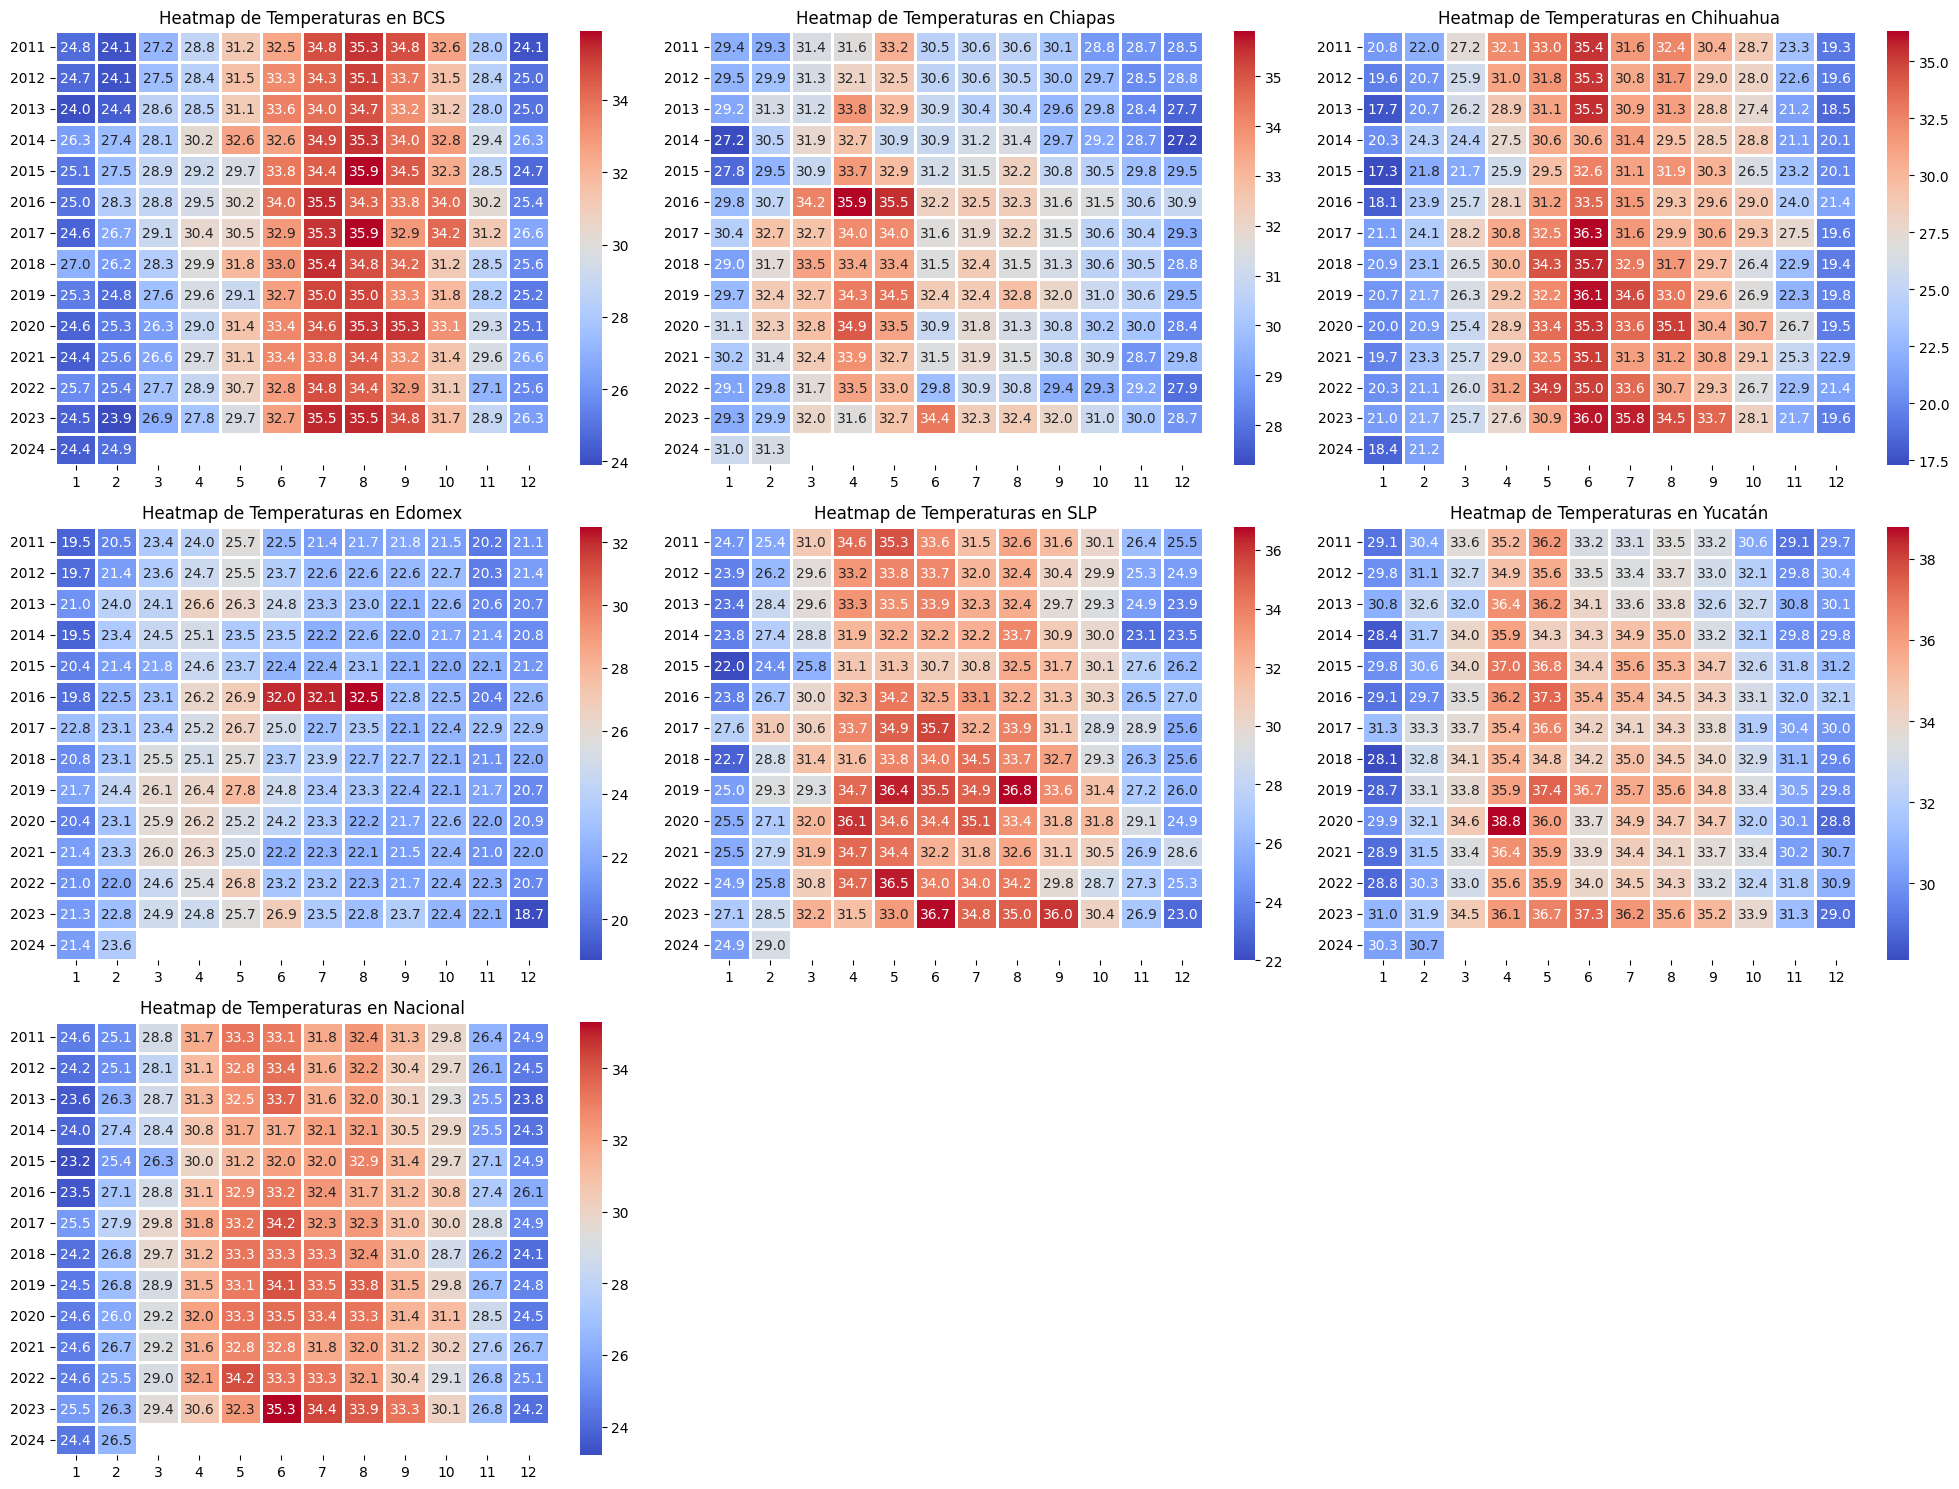

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df1 ya está definido y tiene una columna 'Fecha' en formato datetime
# Extraer año y mes de la columna 'Fecha'
df1['Año'] = df1['Fecha'].dt.year
df1['Mes'] = df1['Fecha'].dt.month

# Eliminar la columna 'Fecha' para quedarnos solo con las temperaturas por estado
df_temperaturas = df1.drop(columns=['Fecha'])

# Lista con los nombres de los estados (columnas en el DataFrame)
estados = df_temperaturas.columns.tolist()

# Número de estados que queremos mostrar (quitamos los dos últimos)
estados = estados[:-2]
num_estados = len(estados)

# Configurar subplots
ncols = 3
nrows = (num_estados + ncols - 1) // ncols  # Calcular el número de filas necesario
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

for i, estado in enumerate(estados):
    # Agrupar por año y mes, calcular la temperatura promedio
    df_estado_grouped = df_temperaturas.groupby(['Año', 'Mes'])[estado].mean().unstack()

    # Crear el heatmap para el estado actual
    sns.heatmap(df_estado_grouped, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt=".1f", ax=axes[i])
    axes[i].set_title(f'Heatmap de Temperaturas en {estado}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



muestra una serie de gráficos de calor (heatmaps) que representan las temperaturas en diferentes estados de México a lo largo de varios años. Cada gráfico de calor corresponde a un estado específico y al promedio nacional, y muestra las temperaturas mensuales desde el año 2011 hasta el 2024.

## ANÁLISIS ESTADÍSTICO DEL PRECIO DE LAS FRUTAS
1. Cálculo de mediana
2. Calculo de moda
3. Variabilidad

 ## 1. CALCULO DE MEDIANA

In [ ]:
import pandas as pd
# PASO 3. CALCULO DE LAS MEDIANAS

# Filtra los datos para cada producto específico
aguacate = df[df['Genérico'] == 'Aguacate']
cebolla = df[df['Genérico'] == 'Cebolla']
jitomate = df[df['Genérico'] == 'Jitomate']
naranja = df[df['Genérico'] == 'Naranja']

# Calcula la mediana de precios para cada producto en cada año y ciudad
mediana_aguacate = aguacate.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].median().reset_index().rename(columns={'Precio promedio': 'Mediana Aguacate'})
mediana_cebolla = cebolla.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].median().reset_index().rename(columns={'Precio promedio': 'Mediana Cebolla'})
mediana_jitomate = jitomate.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].median().reset_index().rename(columns={'Precio promedio': 'Mediana Jitomate'})
mediana_naranja = naranja.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].median().reset_index().rename(columns={'Precio promedio': 'Mediana Naranja'})

# Combina las medianas en un solo DataFrame
resultados_mediana = pd.merge(mediana_aguacate, mediana_cebolla, on=['Año', 'Nombre ciudad'], how='outer')
resultados_mediana = pd.merge(resultados_mediana, mediana_jitomate, on=['Año', 'Nombre ciudad'], how='outer')
resultados_mediana = pd.merge(resultados_mediana, mediana_naranja, on=['Año', 'Nombre ciudad'], how='outer')

# Mostrar los resultados en tabla
from IPython.display import display, HTML

display(HTML("<h2>Medianas de Precios por Año y Ciudad</h2>"))
display(resultados_mediana)


Año            Nombre ciudad  Mediana Aguacate  Mediana Cebolla  \
0   2011        Cd. Juárez, Chih.            33.300            9.200   
1   2011           La Paz, B.C.S.            40.000           11.115   
2   2011             Mérida, Yuc.            32.000           10.500   
3   2011  San Luis Potosí, S.L.P.            32.800            6.975   
4   2011         Tapachula, Chis.            38.665            9.000   
..   ...                      ...               ...              ...   
79  2024           La Paz, B.C.S.            65.100           53.825   
80  2024             Mérida, Yuc.            40.000           46.750   
81  2024  San Luis Potosí, S.L.P.            55.250           40.250   
82  2024         Tapachula, Chis.            58.250           42.075   
83  2024     Toluca, Edo. de Méx.            58.125           44.725   

    Mediana Jitomate  Mediana Naranja  
0             13.820            7.455  
1             15.465            7.825  
2             15.975            7.745  
3             11.470            6.420  
4             12.500            8.400  
..               ...              ...  
79            38.665           31.075  
80            37.500           15.175  
81            40.340           20.250  
82            31.750           26.300  
83            40.625           21.125  

[84 rows x 6 columns]

Este conjunto de datos presenta las medianas de precios de varios productos (aguacate, cebolla, jitomate y naranja) en diferentes ciudades de México durante los años 2011 y 2024.

Observaciones
Rango de Años: Los datos abarcan desde el año 2011 hasta 2024.
Ciudades Incluidas: Chihuahua, BCS, Yucatan, San Luis Potosí, Chiapas, y Toluca.
Incremento de Precios: Parece haber un incremento notable en los precios de todos los productos en las ciudades a lo largo de los años.

## 2. MODA

In [ ]:
import pandas as pd
from statistics import mode

# Filtrar los datos para cada producto específico
aguacate = df[df['Genérico'] == 'Aguacate']
cebolla = df[df['Genérico'] == 'Cebolla']
jitomate = df[df['Genérico'] == 'Jitomate']
naranja = df[df['Genérico'] == 'Naranja']

# Calcular la moda de los precios para cada producto en cada año, mes y ciudad
moda_aguacate = mode(aguacate['Precio promedio'])
moda_cebolla = mode(cebolla['Precio promedio'])
moda_jitomate = mode(jitomate['Precio promedio'])
moda_naranja = mode(naranja['Precio promedio'])

print("Moda de los precios de las frutas y verduras")
print("Moda Aguacate: ", moda_aguacate)
print("Moda Cebolla: ", moda_cebolla)
print("Moda Jitomate: ", moda_jitomate)
print("Moda Naranja: ", moda_naranja)

Moda de los precios de las frutas y verduras
Moda Aguacate:  50.0
Moda Cebolla:  10.0
Moda Jitomate:  25.0
Moda Naranja:  10.0


##Interpretación##

Aguacate

La moda para el precio del aguacate es 50.0. Esto significa que, en el conjunto de datos considerado, el precio de 50.0 es el más frecuente.

Cebolla

La moda para el precio de la cebolla es 10.0, indicando que este precio es el más comúnmente registrado en los datos.

Jitomate

La moda para el precio del jitomate es 25.0. Este es el precio que aparece con mayor frecuencia en el conjunto de datos.

Naranja

La moda para el precio de la naranja es 10.0, lo que indica que este precio es el más frecuente en los datos.

## 3. CÁLCULO DE VARIABILIDAD

In [ ]:
import numpy as np
import pandas as pd


variabilidad = df.groupby('Genérico')['Precio promedio'].std()

print("La variabilidad (desviación estándar) es:")
print(variabilidad)

La variabilidad (desviación estándar) es:
Genérico
Aguacate    20.203253
Cebolla      9.974246
Jitomate     8.356565
Naranja     10.429907
Name: Precio promedio, dtype: float64


##Interpretación##

Aguacate

La desviación estándar es 20.203253, lo cual es relativamente alto. Esto sugiere que los precios del aguacate tienden a variar considerablemente en el conjunto de datos. Es probable que haya fluctuaciones significativas en los precios del aguacate.

Cebolla

La desviación estándar es 9.974246. Este valor indica que los precios de la cebolla tienen una variabilidad moderada. Hay cierta dispersión en los precios, pero no es tan alta como en el caso del aguacate.

Jitomate

La desviación estándar es 8.356565, lo que sugiere que los precios del jitomate tienen una variabilidad relativamente baja en comparación con el aguacate y la cebolla. Los precios del jitomate son más estables y menos dispersos.

Naranja

La desviación estándar es 10.429907. Este valor muestra que los precios de la naranja tienen una dispersión moderada. La variabilidad es mayor que la del jitomate pero menor que la del aguacate.


## ANÁLISIS ESTADÍSTICO DELA TEMPERATURA
1. Calculo de media
2. Cálculo de mediana
3. Calculo de moda
4. Variabilidad

In [ ]:
import pandas as pd

# Convertir la columna 'Fecha' a tipo datetime
df1['Fecha'] = pd.to_datetime(df1['Fecha'])

# Calcular la media, la mediana, la moda y la desviación estándar de las temperaturas para cada estado
media_temperaturas = df1[['BCS', 'Chiapas', 'Chihuahua', 'Edomex', 'SLP', 'Yucatán', 'Nacional']].mean()
mediana_temperaturas = df1[['BCS', 'Chiapas', 'Chihuahua', 'Edomex', 'SLP', 'Yucatán', 'Nacional']].median()
moda_temperaturas = df1[['BCS', 'Chiapas', 'Chihuahua', 'Edomex', 'SLP', 'Yucatán', 'Nacional']].mode().iloc[0]
desviacion_temperaturas = df1[['BCS', 'Chiapas', 'Chihuahua', 'Edomex', 'SLP', 'Yucatán', 'Nacional']].std()

# Crear un DataFrame con la media, la mediana, la moda y la desviación estándar
summary_df = pd.DataFrame({
    'Media': media_temperaturas,
    'Mediana': mediana_temperaturas,
    'Moda': moda_temperaturas,
    'Desviación Estándar': desviacion_temperaturas
})

# Mostrar la tabla
summary_df_html = summary_df.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('font-weight', 'bold')]}]
).set_caption('Media, Mediana, Moda y Desviación Estándar de las Temperaturas por Estado')

display(summary_df_html)


##Interpretación##

Baja California Sur (BCS)

Las temperaturas en BCS son relativamente cálidas y están moderadamente dispersas. La moda (34.8°C) sugiere que a veces puede haber picos de calor significativos.

Chiapas

Las temperaturas en Chiapas son altas y bastante consistentes, con baja dispersión, indicando un clima cálido y estable.

Chihuahua

 Chihuahua muestra una gran variabilidad en las temperaturas, con una desviación estándar alta, indicando un clima más diverso. La moda más baja (19.6°C) sugiere que puede haber periodos fríos.

Estado de México (Edomex)

El Estado de México tiene temperaturas moderadas con una variabilidad relativamente baja, sugiriendo un clima templado y estable.

San Luis Potosí (SLP)

Las temperaturas en SLP son cálidas con una dispersión moderada. La moda cercana a la media y la mediana sugiere consistencia en las temperaturas.

Yucatán

Yucatán tiene las temperaturas más altas entre los estados listados, con variabilidad baja, indicando un clima muy cálido y estable.

Nacional

A nivel nacional, las temperaturas son cálidas con una variabilidad moderada, reflejando la diversidad climática del país.

## Agrupación y Pivotación de Datos de la base de datos del promedio de los precios:


In [ ]:
# 3.1 Calcula los resúmenes estadísticos para cada producto en cada ciudad y año
resumen_aguacate = aguacate.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].describe()
resumen_cebolla = cebolla.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].describe()
resumen_jitomate = jitomate.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].describe()
resumen_naranja = naranja.groupby(['Año', 'Nombre ciudad'])['Precio promedio'].describe()

# 3.2 Compara los resúmenes estadísticos con los promedios calculados
print("Resumen estadístico para Aguacate:")
print(resumen_aguacate)
print("\nResumen estadístico para Cebolla:")
print(resumen_cebolla)
print("\nResumen estadístico para Jitomate:")
print(resumen_jitomate)
print("\nResumen estadístico para Naranja:")
print(resumen_naranja)

Resumen estadístico para Aguacate:
                              count       mean        std    min      25%  \
Año  Nombre ciudad                                                          
2011 Cd. Juárez, Chih.         96.0  36.847708  12.755419  17.11  26.9225   
     La Paz, B.C.S.            96.0  45.616875  15.474605  20.05  34.0000   
     Mérida, Yuc.              96.0  35.455417  18.417339   6.45  22.4500   
     San Luis Potosí, S.L.P.   96.0  35.648438  14.126427  14.00  25.0950   
     Tapachula, Chis.          96.0  41.722083  14.446354  15.85  30.5650   
...                             ...        ...        ...    ...      ...   
2024 La Paz, B.C.S.            20.0  66.211000  12.121220  44.58  58.5525   
     Mérida, Yuc.              20.0  46.272500  12.841057  26.25  38.8750   
     San Luis Potosí, S.L.P.   20.0  55.615500  10.371896  37.53  48.4375   
     Tapachula, Chis.          16.0  58.014375  15.926181  25.00  52.8500   
     Toluca, Edo. de Méx.      18.0  56.5

In [ ]:
# 3.3 Verifica la estructura y contenido del DataFrame agrupado
print("\nDataFrame agrupado de promedios:")
print(resultados.head())
print("\nInformación del DataFrame agrupado:")
print(resultados.info())


DataFrame agrupado de promedios:
    Año            Nombre ciudad  Promedio Aguacate  Promedio Cebolla  \
0  2011        Cd. Juárez, Chih.          36.847708          9.488000   
1  2011           La Paz, B.C.S.          45.616875         11.515083   
2  2011             Mérida, Yuc.          35.455417         10.760167   
3  2011  San Luis Potosí, S.L.P.          35.648438          7.630583   
4  2011         Tapachula, Chis.          41.722083          9.755000   

   Promedio Jitomate  Promedio Naranja  
0          15.604762          7.883333  
1          17.711607          7.923333  
2          17.126548          8.141042  
3          12.758571          6.371979  
4          13.539048         23.704271  

Información del DataFrame agrupado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                84 non-null     int64 

Este DataFrame presentado muestra información sobre los promedios de precios de diferentes productos agrícolas en distintas ciudades durante el año 2011 al 2022. Incluye datos como el promedio de precios de aguacate, cebolla, jitomate y naranja en ciudades como Ciudad Juárez (Chihuahua), La Paz (Baja California Sur), Mérida (Yucatán), San Luis Potosí y Tapachula (Chiapas). Cada fila del DataFrame proporciona el promedio de precios de estos productos en una ciudad específica para el año mencionado.

Agrupación y Pivotación de Datos de la base de datos del promedio de las temperaturas:

In [ ]:
# Calcula los resúmenes estadísticos para cada ciudad y año
resumen_temperaturas = df1.groupby(df1['Fecha'].dt.year)[['BCS', 'Chiapas', 'Chihuahua', 'Edomex', 'SLP', 'Yucatán', 'Nacional']].describe()

# Visualizar los resúmenes estadísticos
print("Resumen estadístico de temperaturas por año:")
print(resumen_temperaturas)

Resumen estadístico de temperaturas por año:
        BCS                                                         Chiapas  \
      count       mean       std   min     25%    50%     75%   max   count   
Fecha                                                                         
2011   12.0  29.850000  4.245747  24.1  26.600  30.00  33.150  35.3    12.0   
2012   12.0  29.791667  3.958066  24.1  26.875  29.95  33.400  35.1    12.0   
2013   12.0  29.691667  3.853796  24.0  27.250  29.85  33.300  34.7    12.0   
2014   12.0  30.825000  3.295210  26.3  27.925  31.40  33.100  35.3    12.0   
2015   12.0  30.375000  3.753816  24.7  28.250  29.45  33.950  35.9    12.0   
2016   12.0  30.750000  3.557962  25.0  28.675  30.20  34.000  35.5    12.0   
2017   12.0  30.858333  3.602892  24.6  28.500  30.85  33.225  35.9    12.0   
2018   12.0  30.491667  3.418787  25.6  27.975  30.55  33.300  35.4    12.0   
2019   12.0  29.800000  3.730464  24.8  27.025  29.35  32.850  35.0    12.0   
2020   

In [ ]:
# Verifica la estructura y contenido del DataFrame agrupado
print("\nDataFrame agrupado de temperaturas:")
print(df1.head())
print("\nInformación del DataFrame agrupado:")
print(df1.info())


DataFrame agrupado de temperaturas:
       Fecha   BCS  Chiapas  Chihuahua  Edomex   SLP  Yucatán  Nacional   Año  \
0 2011-01-01  24.8     29.4       20.8    19.5  24.7     29.1      24.6  2011   
1 2011-02-01  24.1     29.3       22.0    20.5  25.4     30.4      25.1  2011   
2 2011-03-01  27.2     31.4       27.2    23.4  31.0     33.6      28.8  2011   
3 2011-04-01  28.8     31.6       32.1    24.0  34.6     35.2      31.7  2011   
4 2011-05-01  31.2     33.2       33.0    25.7  35.3     36.2      33.3  2011   

   Mes  
0    1  
1    2  
2    3  
3    4  
4    5  

Información del DataFrame agrupado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      158 non-null    datetime64[ns]
 1   BCS        158 non-null    float64       
 2   Chiapas    158 non-null    float64       
 3   Chihuahua  158 non-null    float64      

Este DataFrame agrupado muestra información sobre las temperaturas en diferentes estados de México durante el año 2011 al 2024. Incluye datos como las temperaturas registradas en Baja California Sur (BCS), Chiapas, Chihuahua, Estado de México (Edomex), San Luis Potosí (SLP) y Yucatán en fechas particulares de cada mes. También se proporciona información adicional sobre el año y mes a los que corresponden los datos de temperatura.

# MODELOS PARA DESCRIBIR A LAS VARIABLES

1. Regresión Lineal
2. Regresión Cuadrática
3. Modelo de regresión GAM

In [ ]:
# Verifica la estructura y contenido del DataFrame agrupado
print("\nDataFrame agrupado de temperaturas:")
print(df1.head())
print("\nInformación del DataFrame agrupado:")
print(df1.info())


DataFrame agrupado de temperaturas:
       Fecha   BCS  Chiapas  Chihuahua  Edomex   SLP  Yucatán  Nacional   Año  \
0 2011-01-01  24.8     29.4       20.8    19.5  24.7     29.1      24.6  2011   
1 2011-02-01  24.1     29.3       22.0    20.5  25.4     30.4      25.1  2011   
2 2011-03-01  27.2     31.4       27.2    23.4  31.0     33.6      28.8  2011   
3 2011-04-01  28.8     31.6       32.1    24.0  34.6     35.2      31.7  2011   
4 2011-05-01  31.2     33.2       33.0    25.7  35.3     36.2      33.3  2011   

   Mes  
0    1  
1    2  
2    3  
3    4  
4    5  

Información del DataFrame agrupado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      158 non-null    datetime64[ns]
 1   BCS        158 non-null    float64       
 2   Chiapas    158 non-null    float64       
 3   Chihuahua  158 non-null    float64      

## 1. Regresión lineal


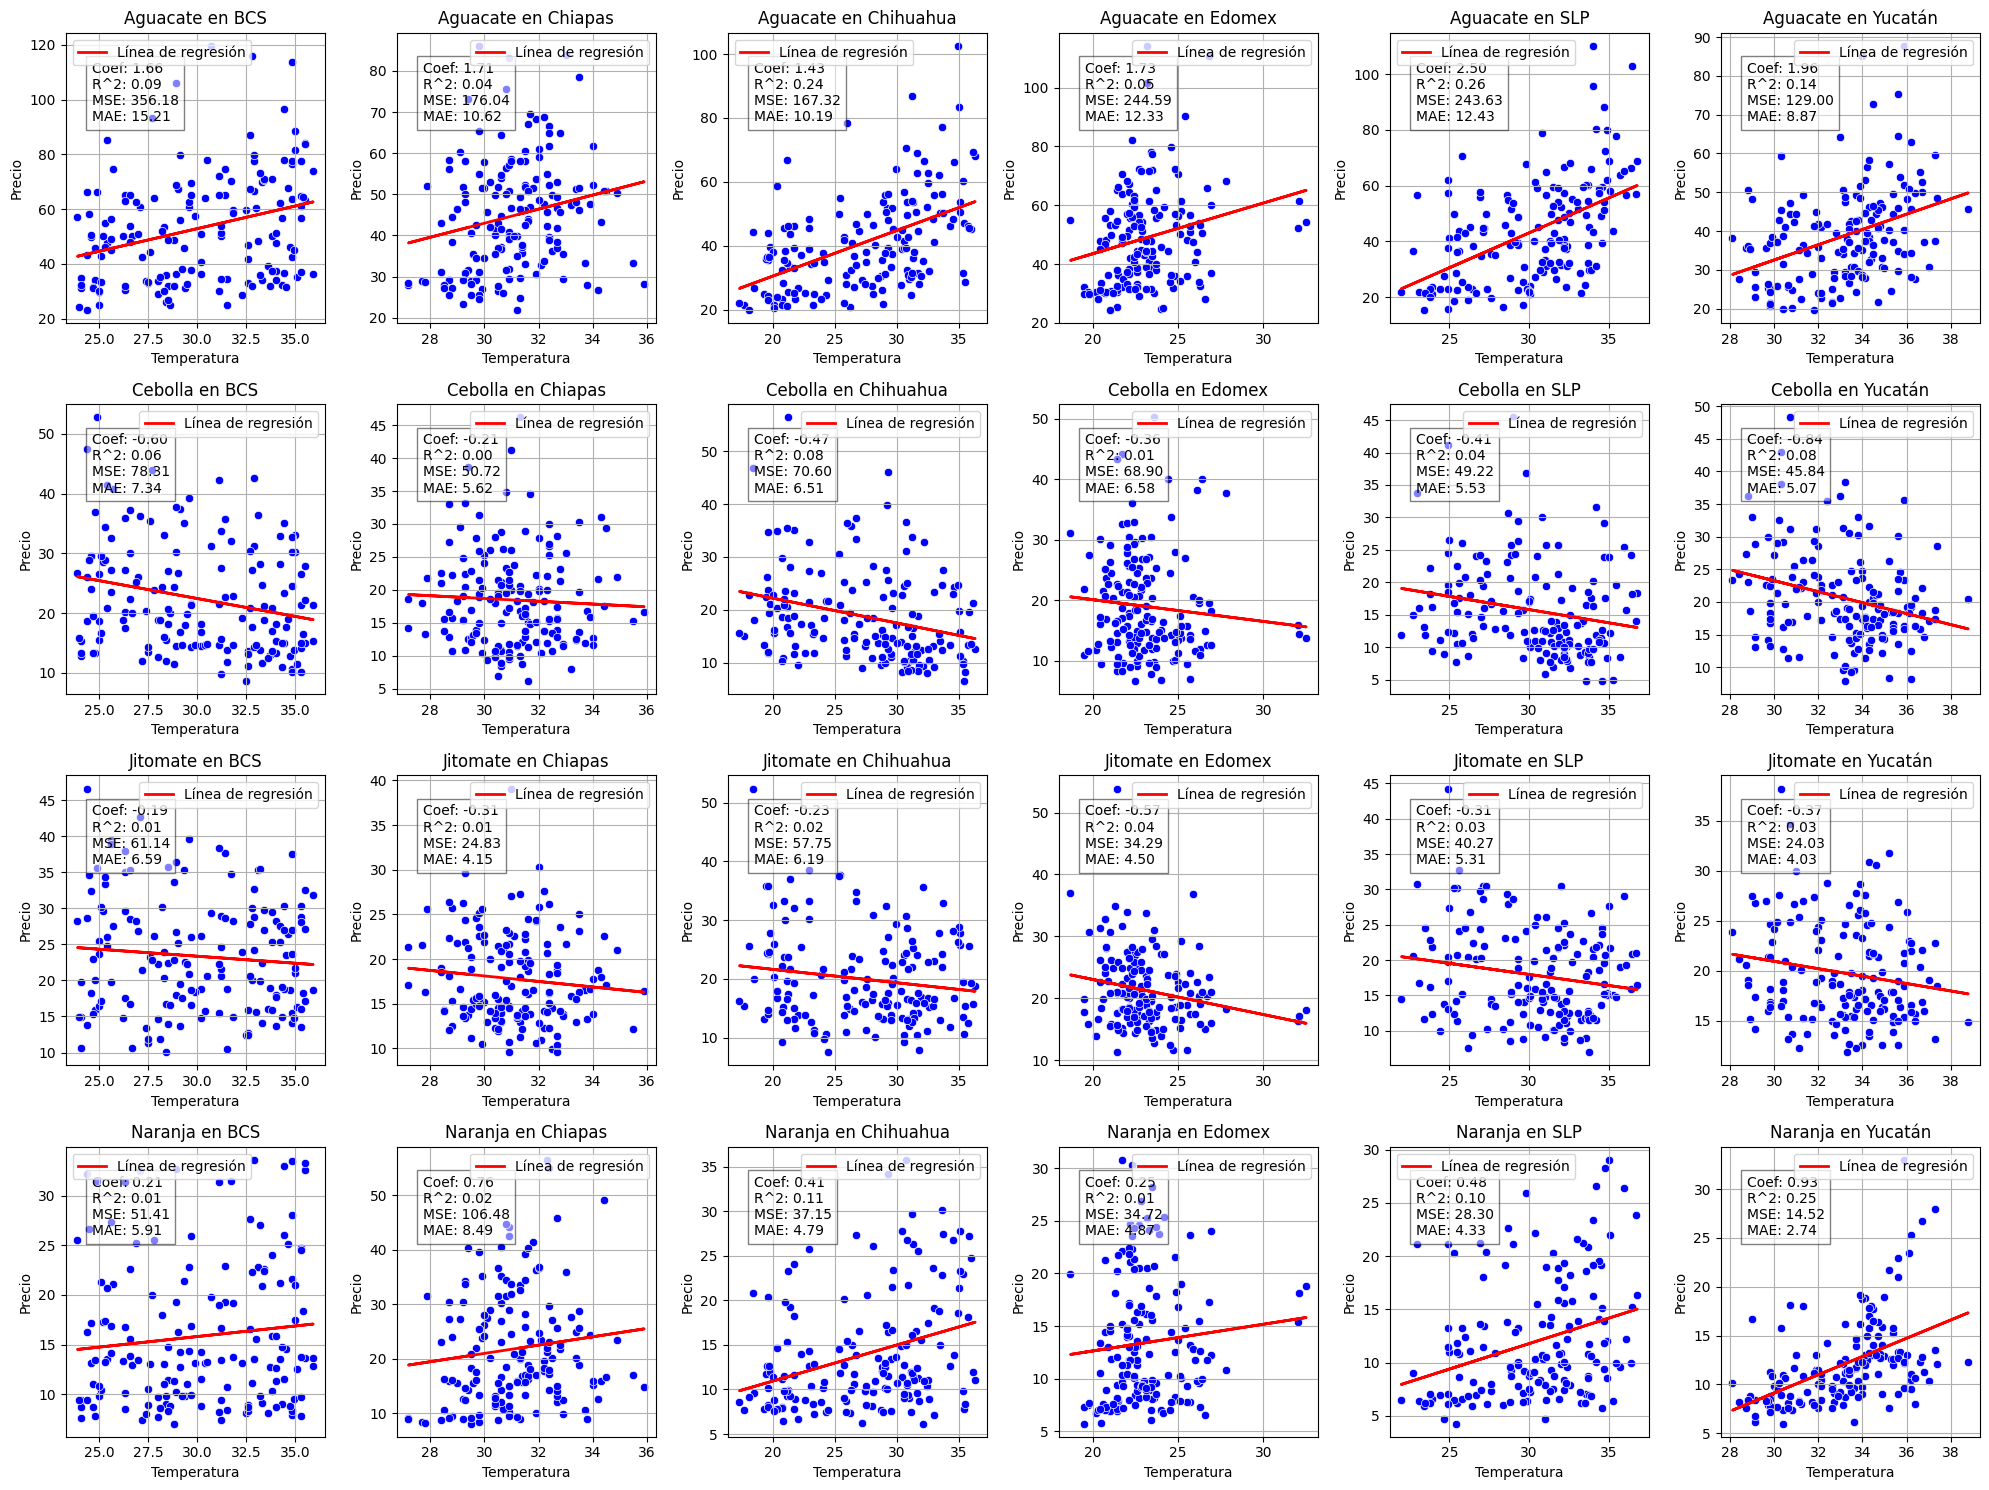

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
temperaturas_df = pd.read_excel('/content/temperaturas.xlsx')  # Asegúrate de proporcionar la ruta correcta
precios_df = pd.read_excel('/content/datos_precios.xlsx')  # Asegúrate de proporcionar la ruta correcta

# Convertir la columna de fecha en ambas bases de datos
temperaturas_df['Fecha'] = pd.to_datetime(temperaturas_df['Fecha'])
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'])

# Pivotar la tabla de temperaturas
temperaturas_pivot = temperaturas_df.melt(id_vars=['Fecha'], var_name='Estado', value_name='Temperatura')

# Fusionar la tabla de temperaturas pivotada con la tabla de precios
merged_df = pd.merge(temperaturas_pivot, precios_df, left_on=['Estado', 'Fecha'], right_on=['Nombre', 'Fecha'])

# Obtener los estados únicos
estados = merged_df['Estado'].unique()

# Iterar sobre cada fruta para ajustar un modelo de regresión por estado
frutas = merged_df['Genérico'].unique()

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=len(frutas), ncols=len(estados), figsize=(20, 15))

# Iterar sobre cada fruta para graficar la dispersión de los datos y la línea de regresión por estado
for i, fruta in enumerate(frutas):
    # Filtrar datos para la fruta específica
    data_fruta = merged_df[merged_df['Genérico'] == fruta]

    # Iterar sobre cada estado para graficar
    for j, estado in enumerate(estados):
        # Filtrar datos para el estado específico
        data_estado = data_fruta[data_fruta['Estado'] == estado]

        # Separar variables independientes (temperaturas) y dependientes (precios)
        X = data_estado[['Temperatura']]
        y = data_estado['Precio']

        # Ajustar el modelo de regresión lineal
        model = LinearRegression()
        model.fit(X, y)

        # Predicciones
        y_pred = model.predict(X)

        # Calcular métricas
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        coef = model.coef_[0]

        # Graficar
        sns.scatterplot(x='Temperatura', y='Precio', data=data_estado, ax=axes[i, j], color='blue')
        axes[i, j].plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
        axes[i, j].set_title(f'{fruta} en {estado}')
        axes[i, j].set_xlabel('Temperatura')
        axes[i, j].set_ylabel('Precio')
        axes[i, j].legend()
        axes[i, j].grid(True)
        # Agregar texto con métricas
        axes[i, j].text(0.1, 0.9, f'Coef: {coef:.2f}\nR^2: {r2:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}', transform=axes[i, j].transAxes,
                        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()


In [ ]:
# @title ANÁLISIS DEL MODELO LINEAL
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

# Carga de datos
temperaturas_df = pd.read_excel('/content/temperaturas.xlsx')  # Asegúrate de proporcionar la ruta correcta
precios_df = pd.read_excel('/content/datos_precios.xlsx')  # Asegúrate de proporcionar la ruta correcta

# Convertir la columna de fecha en ambas bases de datos
temperaturas_df['Fecha'] = pd.to_datetime(temperaturas_df['Fecha'])
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'])

# Pivotar la tabla de temperaturas
temperaturas_pivot = temperaturas_df.melt(id_vars=['Fecha'], var_name='Estado', value_name='Temperatura')

# Fusionar la tabla de temperaturas pivotada con la tabla de precios
merged_df = pd.merge(temperaturas_pivot, precios_df, left_on=['Estado', 'Fecha'], right_on=['Nombre', 'Fecha'])

# Iterar sobre cada fruta para ajustar un modelo de regresión por estado
frutas = merged_df['Genérico'].unique()

# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre cada fruta para calcular las métricas estadísticas por estado
for fruta in frutas:
    # Filtrar datos para la fruta específica
    data_fruta = merged_df[merged_df['Genérico'] == fruta]

    for estado in estados:
        # Filtrar datos para el estado específico
        data_estado = data_fruta[data_fruta['Estado'] == estado]

        # Separar variables independientes (temperaturas) y dependientes (precios)
        X = data_estado[['Temperatura']]
        y = data_estado['Precio']

        # Ajustar el modelo de regresión lineal
        model = LinearRegression()
        model.fit(X, y)

        # Predicciones
        y_pred = model.predict(X)

        # Calcular métricas
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Calcular p-valores de los coeficientes
        n = len(X)
        p = 1  # Porque solo tenemos una característica
        dof = n - p - 1  # Grados de libertad
        residuos = y - y_pred
        sse = np.sum(residuos ** 2) / dof  # Suma de cuadrados del error
        X_norm = np.linalg.norm(X - np.mean(X)) ** 2
        p_values = []
        for i in range(p):
            t_stat = model.coef_[i] / np.sqrt(sse / X_norm)
            p_val = stats.t.sf(np.abs(t_stat), dof) * 2
            p_values.append(p_val)

        # Almacenar los resultados en la lista
        resultados.append({
            'Fruta': fruta,
            'Estado': estado,
            'P-Values': p_values,
            'R2': r2,
            'MSE': mse,
            'MAE': mae
        })

# Convertir la lista de resultados a un DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar los resultados en una tabla bonita
print(tabulate(resultados_df, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════╤═══════════╤══════════════════════════╤════════════╤══════════╤══════════╕
│    │ Fruta    │ Estado    │ P-Values                 │         R2 │      MSE │      MAE │
╞════╪══════════╪═══════════╪══════════════════════════╪════════════╪══════════╪══════════╡
│  0 │ Aguacate │ BCS       │ [9.716203294229675e-05]  │ 0.0930688  │ 356.178  │ 15.2118  │
├────┼──────────┼───────────┼──────────────────────────┼────────────┼──────────┼──────────┤
│  1 │ Aguacate │ Chiapas   │ [0.007656424059742598]   │ 0.0447062  │ 176.038  │ 10.6187  │
├────┼──────────┼───────────┼──────────────────────────┼────────────┼──────────┼──────────┤
│  2 │ Aguacate │ Chihuahua │ [3.948475346215522e-11]  │ 0.244681   │ 167.324  │ 10.1851  │
├────┼──────────┼───────────┼──────────────────────────┼────────────┼──────────┼──────────┤
│  3 │ Aguacate │ Edomex    │ [0.003073206741373551]   │ 0.0547971  │ 244.587  │ 12.3273  │
├────┼──────────┼───────────┼──────────────────────────┼────────────┼──────────┼

In [ ]:
# @title INTEPRETACION RESULTADOS DE REGRESION LINEAL
from tabulate import tabulate

# Datos proporcionados
data = [
    ("Aguacate", "BCS", "No significativo", "Bajo R2"),
    ("Aguacate", "Chiapas", "No significativo", "Bajo R2"),
    ("Aguacate", "Chihuahua", "No significativo", "Moderado R2"),
    ("Aguacate", "Edomex", "No significativo", "Bajo R2"),
    ("Aguacate", "SLP", "Significativo", "Moderado R2"),
    ("Aguacate", "Yucatán", "No significativo", "Bajo R2"),
    ("Cebolla", "BCS", "No significativo", "Bajo R2"),
    ("Cebolla", "Chiapas", "No significativo", "Muy bajo R2"),
    ("Cebolla", "Chihuahua", "No significativo", "Bajo R2"),
    ("Cebolla", "Edomex", "No significativo", "Muy bajo R2"),
    ("Cebolla", "SLP", "Significativo", "Bajo R2"),
    ("Cebolla", "Yucatán", "No significativo", "Bajo R2"),
    ("Jitomate", "BCS", "No significativo", "Muy bajo R2"),
    ("Jitomate", "Chiapas", "No significativo", "Muy bajo R2"),
    ("Jitomate", "Chihuahua", "No significativo", "Bajo R2"),
    ("Jitomate", "Edomex", "No significativo", "Bajo R2"),
    ("Jitomate", "SLP", "No significativo", "Bajo R2"),
    ("Jitomate", "Yucatán", "No significativo", "Muy bajo R2"),
    ("Naranja", "BCS", "No significativo", "Muy bajo R2"),
    ("Naranja", "Chiapas", "No significativo", "Bajo R2"),
    ("Naranja", "Chihuahua", "No significativo", "Bajo R2"),
    ("Naranja", "Edomex", "No significativo", "Bajo R2"),
    ("Naranja", "SLP", "No significativo", "Bajo R2"),
    ("Naranja", "Yucatán", "Significativo", "Moderado R2")
]

# Headers de la tabla
headers = ["Fruta", "Estado", "Significancia", "R2"]

# Imprimir tabla
print(tabulate(data, headers=headers))


Fruta     Estado     Significancia     R2
--------  ---------  ----------------  -----------
Aguacate  BCS        No significativo  Bajo R2
Aguacate  Chiapas    No significativo  Bajo R2
Aguacate  Chihuahua  No significativo  Moderado R2
Aguacate  Edomex     No significativo  Bajo R2
Aguacate  SLP        Significativo     Moderado R2
Aguacate  Yucatán    No significativo  Bajo R2
Cebolla   BCS        No significativo  Bajo R2
Cebolla   Chiapas    No significativo  Muy bajo R2
Cebolla   Chihuahua  No significativo  Bajo R2
Cebolla   Edomex     No significativo  Muy bajo R2
Cebolla   SLP        Significativo     Bajo R2
Cebolla   Yucatán    No significativo  Bajo R2
Jitomate  BCS        No significativo  Muy bajo R2
Jitomate  Chiapas    No significativo  Muy bajo R2
Jitomate  Chihuahua  No significativo  Bajo R2
Jitomate  Edomex     No significativo  Bajo R2
Jitomate  SLP        No significativo  Bajo R2
Jitomate  Yucatán    No significativo  Muy bajo R2
Naranja   BCS        No significa

Entre las frutas y estados con mayor relacion fue el Aguacate en los estados de Chihuahua, SLP. La naranja tuvo un impacto en SLP, Yucatan y Chihuahua. Las R's cuadradas ajustadas indican en ellos arriba del 10% su relación


## 2. Modelo polinómico

<ipython-input-111-774494e95ee7>:54: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


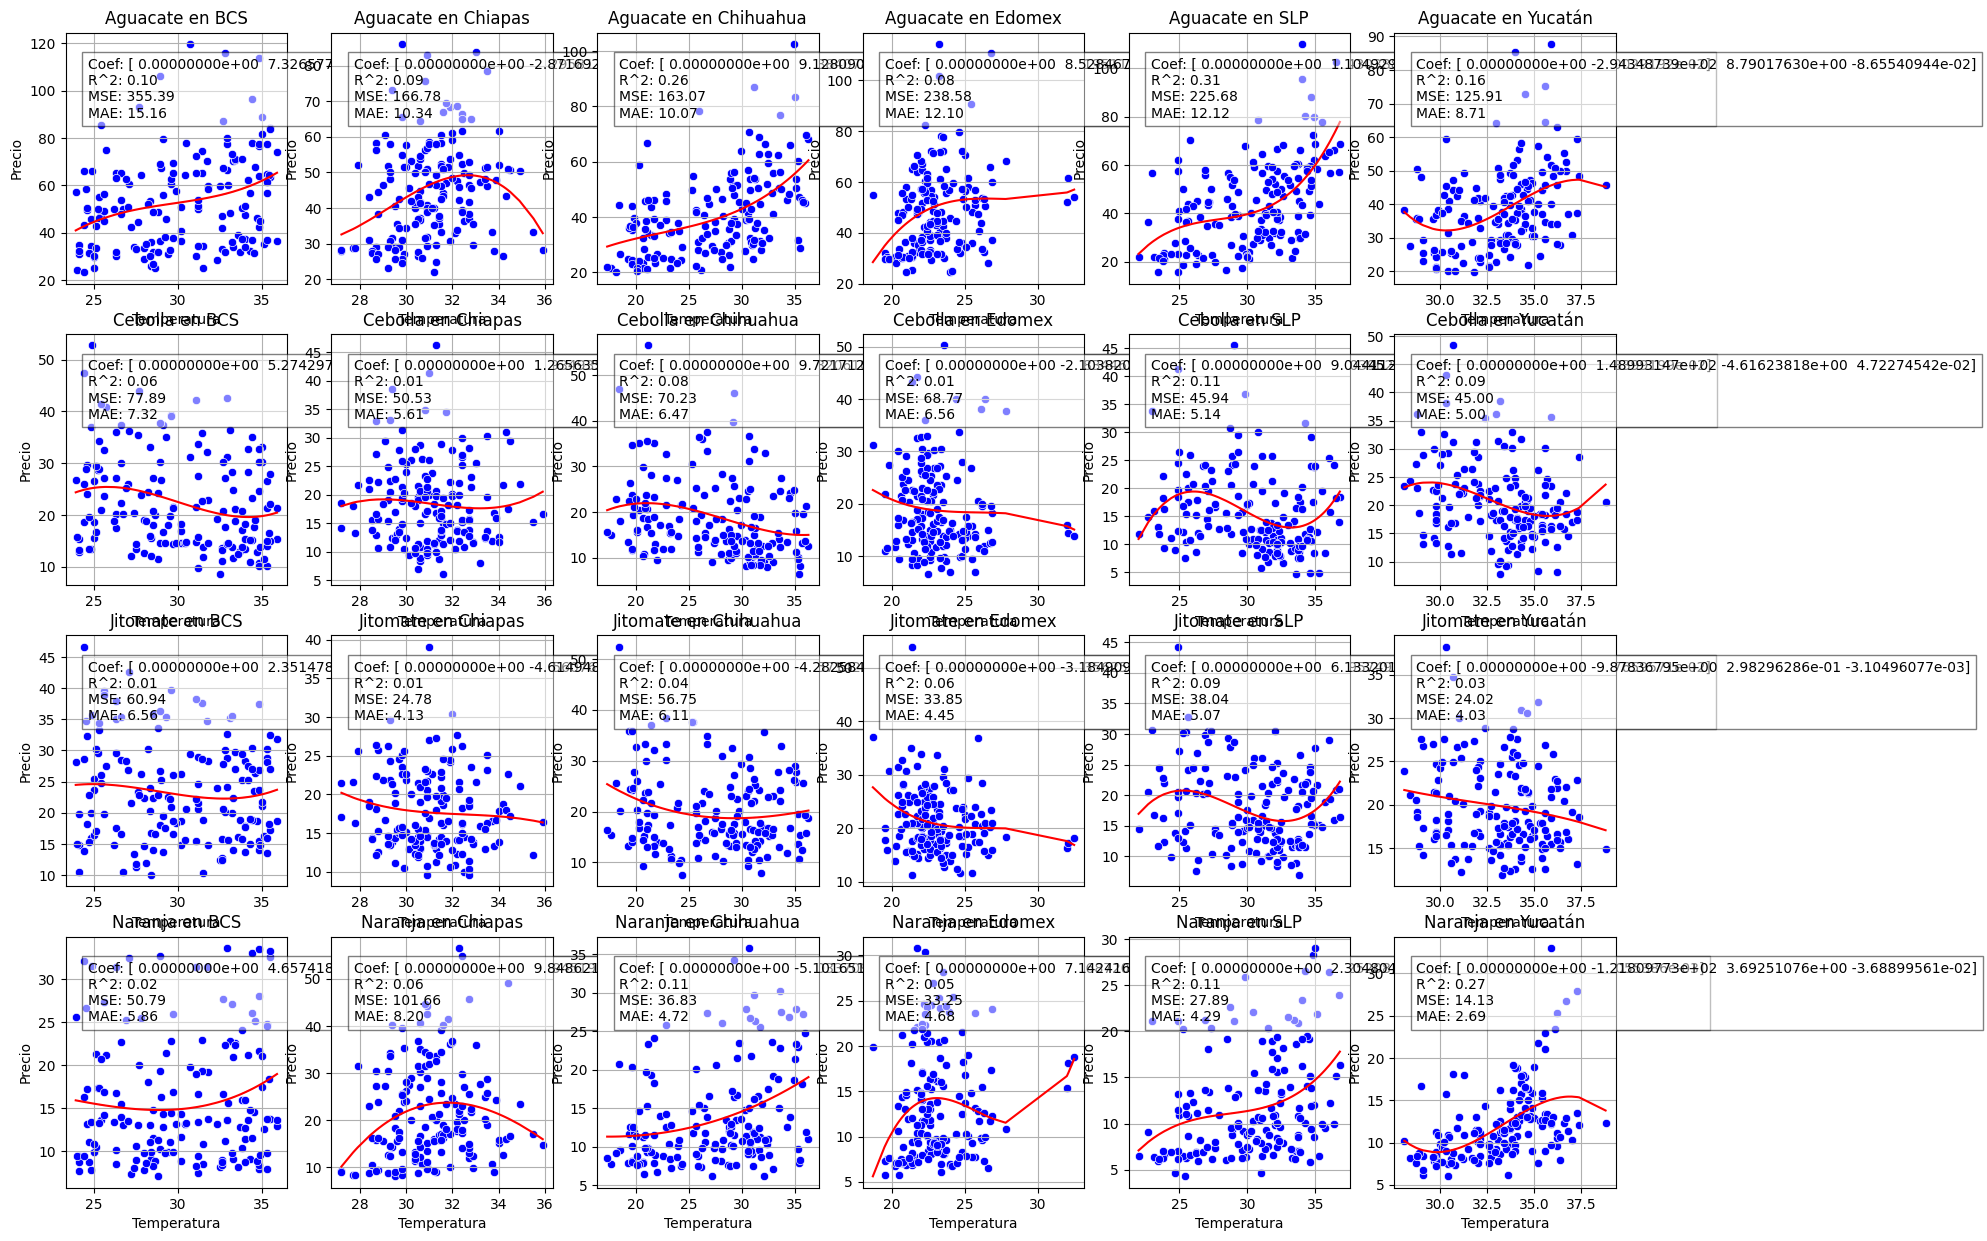

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=len(frutas), ncols=len(estados), figsize=(20, 15))

# Iterar sobre cada fruta para graficar la dispersión de los datos y la línea de regresión por estado
for i, fruta in enumerate(frutas):
    # Filtrar datos para la fruta específica
    data_fruta = merged_df[merged_df['Genérico'] == fruta]

    # Iterar sobre cada estado para graficar
    for j, estado in enumerate(estados):
        # Filtrar datos para el estado específico
        data_estado = data_fruta[data_fruta['Estado'] == estado]

        # Separar variables independientes (temperaturas) y dependientes (precios)
        X = data_estado[['Temperatura']]
        y = data_estado['Precio']

        # Crear características polinómicas
        poly = PolynomialFeatures(degree=3)
        X_poly = poly.fit_transform(X)

        # Ajustar el modelo de regresión cuadrática
        model = LinearRegression()
        model.fit(X_poly, y)

        # Predicciones
        y_pred = model.predict(X_poly)

        # Calcular métricas
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        coef = model.coef_

        # Graficar
        sns.scatterplot(x='Temperatura', y='Precio', data=data_estado, ax=axes[i, j], color='blue')
        sns.lineplot(x=np.array(X['Temperatura']), y=y_pred, ax=axes[i, j], color='red')
        axes[i, j].set_title(f'{fruta} en {estado}')
        axes[i, j].set_xlabel('Temperatura')
        axes[i, j].set_ylabel('Precio')
        axes[i, j].grid(True)
        # Agregar texto con métricas
        axes[i, j].text(0.1, 0.9, f'Coef: {coef}\nR^2: {r2:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}', transform=axes[i, j].transAxes,
                        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

In [ ]:
# @title ANALISIS DEL MODELO POLINÓMICO
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

# Crear un DataFrame para almacenar los resultados
resultados = pd.DataFrame(columns=['Fruta', 'Estado', 'Intercept P-Value', 'Temp P-Value', 'Temp^2 P-Value', 'Temp^3 P-Value', 'R2', 'MSE', 'MAE'])

# Iterar sobre cada fruta para calcular y mostrar las pruebas estadísticas del modelo por estado
for fruta in frutas:
    # Filtrar datos para la fruta específica
    data_fruta = merged_df[merged_df['Genérico'] == fruta]

    # Iterar sobre cada estado para calcular las pruebas estadísticas
    for estado in estados:
        # Filtrar datos para el estado específico
        data_estado = data_fruta[data_fruta['Estado'] == estado]

        if data_estado.empty:
            continue

        # Separar variables independientes (temperaturas) y dependientes (precios)
        X = data_estado[['Temperatura']]
        y = data_estado['Precio']

        # Crear características polinómicas
        poly = PolynomialFeatures(degree=3)
        X_poly = poly.fit_transform(X)

        # Ajustar el modelo de regresión cuadrática con statsmodels
        X_poly_sm = sm.add_constant(X_poly)  # Agregar término constante
        model = sm.OLS(y, X_poly_sm).fit()

        # Calcular métricas
        mse = mean_squared_error(y, model.predict(X_poly_sm))
        mae = mean_absolute_error(y, model.predict(X_poly_sm))
        r2 = r2_score(y, model.predict(X_poly_sm))
        p_values = model.pvalues

        # Crear un DataFrame temporal con los resultados
        temp_result = pd.DataFrame({
            'Fruta': [fruta],
            'Estado': [estado],
            'Intercept P-Value': [p_values[0]],
            'Temp P-Value': [p_values[1]],
            'Temp^2 P-Value': [p_values[2]],
            'Temp^3 P-Value': [p_values[3]],
            'R2': [r2],
            'MSE': [mse],
            'MAE': [mae]
        })

        # Concatenar los resultados temporales al DataFrame principal
        resultados = pd.concat([resultados, temp_result], ignore_index=True)

# Imprimir los resultados en una tabla bonita
resultados_table = tabulate(resultados, headers='keys', tablefmt='fancy_grid', showindex=False)
print(resultados_table)

╒══════════╤═══════════╤═════════════════════╤════════════════╤══════════════════╤══════════════════╤════════════╤══════════╤══════════╕
│ Fruta    │ Estado    │   Intercept P-Value │   Temp P-Value │   Temp^2 P-Value │   Temp^3 P-Value │         R2 │      MSE │      MAE │
╞══════════╪═══════════╪═════════════════════╪════════════════╪══════════════════╪══════════════════╪════════════╪══════════╪══════════╡
│ Aguacate │ BCS       │          0.574537   │     0.560867   │       0.56718    │       0.565093   │ 0.0950645  │ 355.394  │ 15.1564  │
├──────────┼───────────┼─────────────────────┼────────────────┼──────────────────┼──────────────────┼────────────┼──────────┼──────────┤
│ Aguacate │ Chiapas   │          0.419092   │     0.380326   │       0.339925   │       0.305048   │ 0.0949196  │ 166.785  │ 10.3384  │
├──────────┼───────────┼─────────────────────┼────────────────┼──────────────────┼──────────────────┼────────────┼──────────┼──────────┤
│ Aguacate │ Chihuahua │          0.78450

In [ ]:
# @title INTERPRETACIÓN DE LOS RESULTADOS DEL MODELO DE TERCER GRADO
from tabulate import tabulate

# Datos
resultados = {
    'Aguacate': {
        'BCS': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Chiapas': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Chihuahua': {'Significancia': 'No significativo', 'R2': 'moderado'},
        'Edomex': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'SLP': {'Significancia': 'Significativo', 'R2': 'moderado'},
        'Yucatán': {'Significancia': 'No significativo', 'R2': 'bajo'}
    },
    'Cebolla': {
        'BCS': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Chiapas': {'Significancia': 'No significativo', 'R2': 'muy bajo'},
        'Chihuahua': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Edomex': {'Significancia': 'No significativo', 'R2': 'muy bajo'},
        'SLP': {'Significancia': 'Significativo', 'R2': 'bajo'},
        'Yucatán': {'Significancia': 'No significativo', 'R2': 'bajo'}
    },
    'Jitomate': {
        'BCS': {'Significancia': 'No significativo', 'R2': 'muy bajo'},
        'Chiapas': {'Significancia': 'No significativo', 'R2': 'muy bajo'},
        'Chihuahua': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Edomex': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'SLP': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Yucatán': {'Significancia': 'No significativo', 'R2': 'muy bajo'}
    },
    'Naranja': {
        'BCS': {'Significancia': 'No significativo', 'R2': 'muy bajo'},
        'Chiapas': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Chihuahua': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Edomex': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'SLP': {'Significancia': 'No significativo', 'R2': 'bajo'},
        'Yucatán': {'Significancia': 'Significativo', 'R2': 'moderado'}
    }
}

# Formatear datos para la tabla
tabla_datos = []
for fruta, estados in resultados.items():
    for estado, datos in estados.items():
        tabla_datos.append([fruta, estado, datos['Significancia'], datos['R2']])

# Encabezados de la tabla
headers = ["Fruta", "Estado", "Significancia", "R2"]

# Imprimir la tabla
print(tabulate(tabla_datos, headers=headers, tablefmt="pretty"))


+----------+-----------+------------------+----------+
|  Fruta   |  Estado   |  Significancia   |    R2    |
+----------+-----------+------------------+----------+
| Aguacate |    BCS    | No significativo |   bajo   |
| Aguacate |  Chiapas  | No significativo |   bajo   |
| Aguacate | Chihuahua | No significativo | moderado |
| Aguacate |  Edomex   | No significativo |   bajo   |
| Aguacate |    SLP    |  Significativo   | moderado |
| Aguacate |  Yucatán  | No significativo |   bajo   |
| Cebolla  |    BCS    | No significativo |   bajo   |
| Cebolla  |  Chiapas  | No significativo | muy bajo |
| Cebolla  | Chihuahua | No significativo |   bajo   |
| Cebolla  |  Edomex   | No significativo | muy bajo |
| Cebolla  |    SLP    |  Significativo   |   bajo   |
| Cebolla  |  Yucatán  | No significativo |   bajo   |
| Jitomate |    BCS    | No significativo | muy bajo |
| Jitomate |  Chiapas  | No significativo | muy bajo |
| Jitomate | Chihuahua | No significativo |   bajo   |
| Jitomate

# 3. MODELO CON GAM Generalized Additive Models

<ipython-input-114-a0c29e1da1fb>:51: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


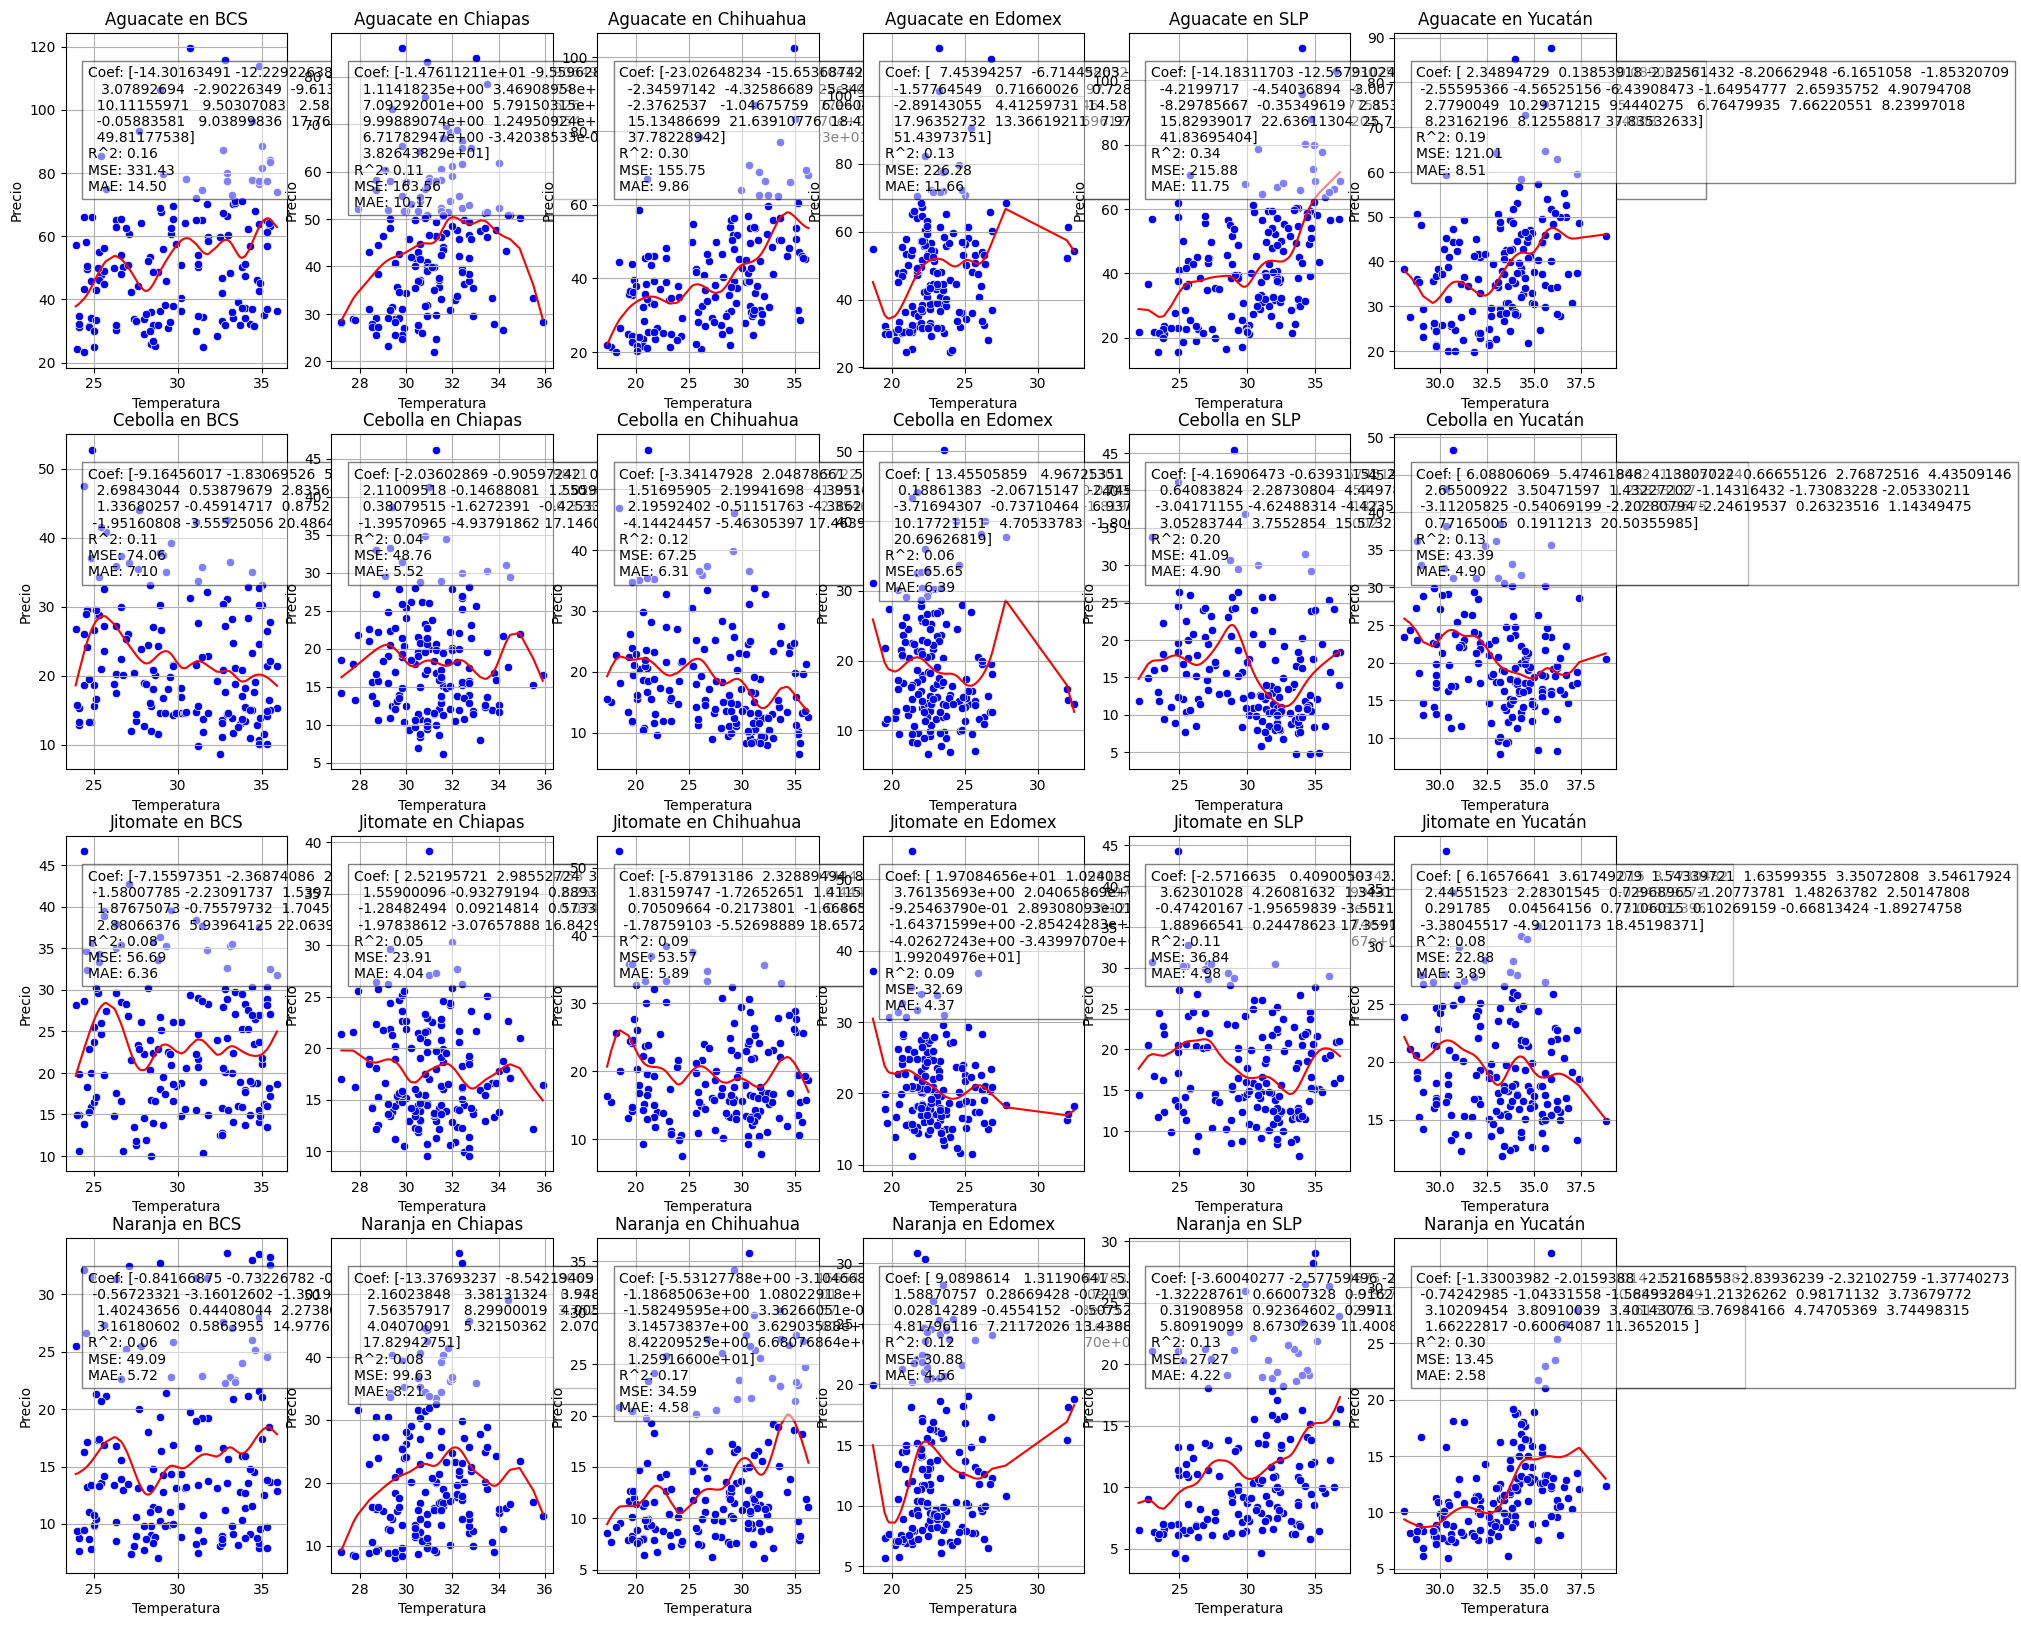

In [ ]:
#INSTALAR PYGAM
!pip install pygam

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pygam import LinearGAM, s

# Crear una figura y ejes para los subplots con una altura mayor
fig, axes = plt.subplots(nrows=len(frutas), ncols=len(estados), figsize=(20, 20))

# Iterar sobre cada fruta para graficar la dispersión de los datos y la línea de regresión por estado
for i, fruta in enumerate(frutas):
    # Filtrar datos para la fruta específica
    data_fruta = merged_df[merged_df['Genérico'] == fruta]

    # Iterar sobre cada estado para graficar
    for j, estado in enumerate(estados):
        # Filtrar datos para el estado específico
        data_estado = data_fruta[data_fruta['Estado'] == estado]

        # Separar variables independientes (temperaturas) y dependientes (precios)
        X = data_estado[['Temperatura']]
        y = data_estado['Precio']

        # Ajustar el modelo GAM
        gam = LinearGAM(s(0)).fit(X, y)

        # Predicciones
        y_pred = gam.predict(X)

        # Calcular métricas
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        coef = gam.coef_

        # Graficar
        sns.scatterplot(x='Temperatura', y='Precio', data=data_estado, ax=axes[i, j], color='blue')
        sns.lineplot(x=np.array(X['Temperatura']), y=y_pred, ax=axes[i, j], color='red')
        axes[i, j].set_title(f'{fruta} en {estado}')
        axes[i, j].set_xlabel('Temperatura')
        axes[i, j].set_ylabel('Precio')
        axes[i, j].grid(True)
        # Agregar texto con métricas
        axes[i, j].text(0.1, 0.9, f'Coef: {coef}\nR^2: {r2:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}', transform=axes[i, j].transAxes,
                        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()


In [ ]:
# @title ANALISIS DEL MODELO GAM
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pygam import LinearGAM, s

# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre cada fruta para calcular las métricas estadísticas por estado
for fruta in frutas:
    # Filtrar datos para la fruta específica
    data_fruta = merged_df[merged_df['Genérico'] == fruta]

    for estado in estados:
        # Filtrar datos para el estado específico
        data_estado = data_fruta[data_fruta['Estado'] == estado]

        # Separar variables independientes (temperaturas) y dependientes (precios)
        X = data_estado[['Temperatura']]
        y = data_estado['Precio']

        # Ajustar el modelo GAM
        gam = LinearGAM(s(0)).fit(X, y)

        # Predicciones
        y_pred = gam.predict(X)

        # Calcular métricas
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Obtener los p-valores de los coeficientes
        p_values = gam.statistics_['p_values']

        # Almacenar los resultados en la lista
        resultados.append({
            'Fruta': fruta,
            'Estado': estado,
            'MSE': mse,
            'MAE': mae,
            'R2': r2,
            'P-Values': p_values
        })

# Convertir la lista de resultados a un DataFrame
resultados_df = pd.DataFrame(resultados)

from tabulate import tabulate

# Convertir el DataFrame de resultados a una tabla bonita
tabla_resultados = tabulate(resultados_df, headers='keys', tablefmt='fancy_grid')

# Mostrar la tabla
print(tabla_resultados)


╒════╤══════════╤═══════════╤══════════╤══════════╤═══════════╤══════════════════════════════════════════════════╕
│    │ Fruta    │ Estado    │      MSE │      MAE │        R2 │ P-Values                                         │
╞════╪══════════╪═══════════╪══════════╪══════════╪═══════════╪══════════════════════════════════════════════════╡
│  0 │ Aguacate │ BCS       │ 331.434  │ 14.4997  │ 0.156073  │ [0.034526224551507334, 1.1102230246251565e-16]   │
├────┼──────────┼───────────┼──────────┼──────────┼───────────┼──────────────────────────────────────────────────┤
│  1 │ Aguacate │ Chiapas   │ 163.562  │ 10.1686  │ 0.112411  │ [0.004345396588613548, 1.1102230246251565e-16]   │
├────┼──────────┼───────────┼──────────┼──────────┼───────────┼──────────────────────────────────────────────────┤
│  2 │ Aguacate │ Chihuahua │ 155.75   │  9.86281 │ 0.296927  │ [1.495017495356521e-06, 1.1102230246251565e-16]  │
├────┼──────────┼───────────┼──────────┼──────────┼───────────┼─────────────────